<h1 style='color: blue; font-size: 50px; font-weight: bold;'> Case Data Master 2024 - Leonardo Aderaldo Vargas - T789785
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
</p>  

O Case proposto apresenta o histórico de dois anos (2015-2017) de uma empresa que oferece serviço de streaming de música baseado em assinatura.

Quando os usuários se inscrevem no serviço, eles podem optar por renovar o serviço manualmente ou renovar automaticamente. Os usuários podem cancelar ativamente sua associação a qualquer momento. 

Para este cenário, temos os seguintes desafios:

1) Problema de Classificação:

- Sabendo que existe a seguinte ação de retenção para clientes: Quando detectamos que um cliente não renova a assinatura, oferecemos 3 meses grátis. Porém, identificamos que essa ação é muito reativa e entendemos que uma abordagem proativa seria mais efetiva.
- Sendo assim, é proposto que você crie um modelo classificador para prever clientes que serão um churn 3 meses no futuro (ou seja, clientes que possuem assinatura ativa no período analisado e 3 meses depois desse período ele não é mais ativo, ou porque cancelou ou não renovou a assinatura) e indique os clientes que serão direcionados para ação de forma proativa
- Assumindo que, usando a ação de forma proativa, 50% dos clientes que iriam cancelar (Verdadeiro Positivo) respondem de forma positiva e continuam ativos por mais um ano, qual sua avaliação sobre sua solução?
- Mínimo esperado: Criação de Target, Feature Engineering, Feature Selection, Predictive Modeling, Quantidade de clientes retidos e resultado financeiro da ação.


2) Problema de Clusterização

- Considerando o problema escolhido (Churn), realize uma análise não-supervisionada dos clientes com objetivo de aprofundar a compreensão sobre características deles.

- Algumas sugestões: análise de clientes com diferentes perfis de uso da plataforma, com as variadas estimações de churn, análise de perfis com diferentes volatidade/incerteza nas respostas de churn, análise de erros sistemáticos cometidos pelos modelos do case supervisionado, análise da variação temporal no comportamento dos clientes da base.


<h1 style='color: Orange; font-size: 50px; font-weight: bold;'> Pontos de Desenvolvimento do Case
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
</p>  

### 1) Criação de Target

- Criar a regra da Target

### 2) Separação de Amostras

- Separação de um conjunto de dados de Treino, Validação, Teste e OOT
- Em cada amostra, conferir se elas são similares. Nessa etapa, posso ver tanto a distribuição de Target quanto compará-las através de Testes de Hipótese como chi2 ou KS

### 3) Análise Exploratória

- Identificar quantas variáveis contínuas e categóricas temos em percentual através de um gráfico de barras
- Identificar qual a porcentagem de valores ausentes em cada variável através de um gráfico de barras
- Para variáveis contínuas: analisar correlação entre as variáveis, analisar distribuição via boxplot a fim de entender se há diferença significativa nas distribuiçoes de cada feature para a Target 0 ou 1, presença de outliers via IIQ...
- Para variáveis categóricas: analisar as distribuições de cada categoria, analisar o Weight of Evidence a fim de entender a relação com a target ou usar testes de chi2...

### 4) Feature Engineering

> 1. Desenvolver features factíveis, úteis e criativas para o meu problema

### 5) Pré-Processamento

> 1. Aplicar Target Encoder através do WOE para as categóricas

> 2. Entender qual método de imputação usarei e se usarei algo...

> 3. Para variáveis contínuas, manter apenas instâncias entre o p1 e o p99 para eliminar erros

> 4. Fazer um cálculo de PSI para as variáveis contínuas e categóricas a fim de garantir features estáveis e, consequentemente, predições estáveis

> 5. Aplicar Escolanemento

### 6) Feature Selection

> 1. Para variáveis contínuas: aplicar o Variance Threshold e eliminar variáveis altamente correlacionadas

> 2. Para variáveis categóricas: aplicar o WOE e calcular um IV, mantendo apenas as categóricas com IV alto

> 3. Rodar uma Random Forest Feature Importance para fazer o filtro final

### 7) Classificador

> 1.  Treinar uma Regressão Logística, Random Forest e um XGBoost
> 2. Fazer otimização de hiperparâmetros
> 3. Fazer calibração de probabilidades
> 4. Definir o threshold de decisão para classes 0 ou 1

### 8) Análise de Resultados

> 1. Responder as questões propostas

### 9) Clusterização

> 1. Fazer um não supervisionado que seja capaz de inferir algo próximo ao classificador e discutir as mudanças
> 2. Testarei um KMeans, Hierarquico ou DBSCAN a depender da natureza dos meus dados


<font color='purple' style='font-size: 40px;'> Bibliotecas </font>
<hr style='border: 2px solid purple;'>

In [1]:

## Bibliotecas de Análise de Dados
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image
from tabulate import tabulate
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Bibliotecas de Manipulação de Tempo
from datetime import datetime, date

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform, chi2_contingency
from statsmodels.stats.weightstats import ztest
from numpy import interp
import random

# Bibliotecas de Seleção de Modelos
from skopt import BayesSearchCV
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Bibliotecas de Métricas de Machine Learning
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, precision_recall_curve, average_precision_score, f1_score, log_loss, brier_score_loss, confusion_matrix, silhouette_score

# Parâmetros de Otimização
import random
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F
 

# # Spark Session
# spark = SparkSession.builder.getOrCreate()

<font color='yellow' style='font-size: 40px;'> Importação de Dados </font>
<hr style='border: 2px solid yellow;'>

### 1) Base Members

> 1. msno: user id

> 2. city: cidade

> 3. bd: idade --> essa coluna tem outliers desde -7000 até 2015

> 4. registered_via: tipo de registro

> 5. registration_init_time: data do registro inicial no formato %Y%m%d

> 6. gender: gênero

> 7. is_ativo: assinatura ativa (Target Classificador Problema 1)

> 8. safra: safra

### 2) Base Transacations

> 1. msno: user id

> 2. payment_method_id: método de pagamento

> 3. payment_plan_days: quantidade de dias de afiliação

> 4. plan_list_price: preço

> 5. actual_amount_paid: montante pago

> 6. is_auto_renew: flag renovação automática

> 7. transaction_date: data da transação no formato %Y%m%d

> 8. membership_expire_date: data de expiração da afiliação

> 9. is_cancel: flag que indica se o usuário cancelou ou não a afiliação nesta transação

### 3) Base User Logs

> 1. msno: user id

> 2. safra

> 3. num_25: quantidade de músicas tocadas por menos de 25% da duração da música

> 4. num_50: quantidade de músicas tocadas entre 25% e 50% da duração da música

> 5. num_75: quantidade de músicas tocadas entre 50% e 75% da duração da música

> 6. num_985: quantidade de músicas tocadas entre 75% até 98.5% da duração da música

> 7. num_100: quantidade de músicas tocadas entre 98.5% até 100% da duração da música

> 8. num_unq: quantidade única de músicas já tocadas

> 9. total_scs: número total de segundos tocados

<font color='red' style='font-size: 40px;'> 1) Definição da Target</font>
<hr style='border: 2px solid red;'>

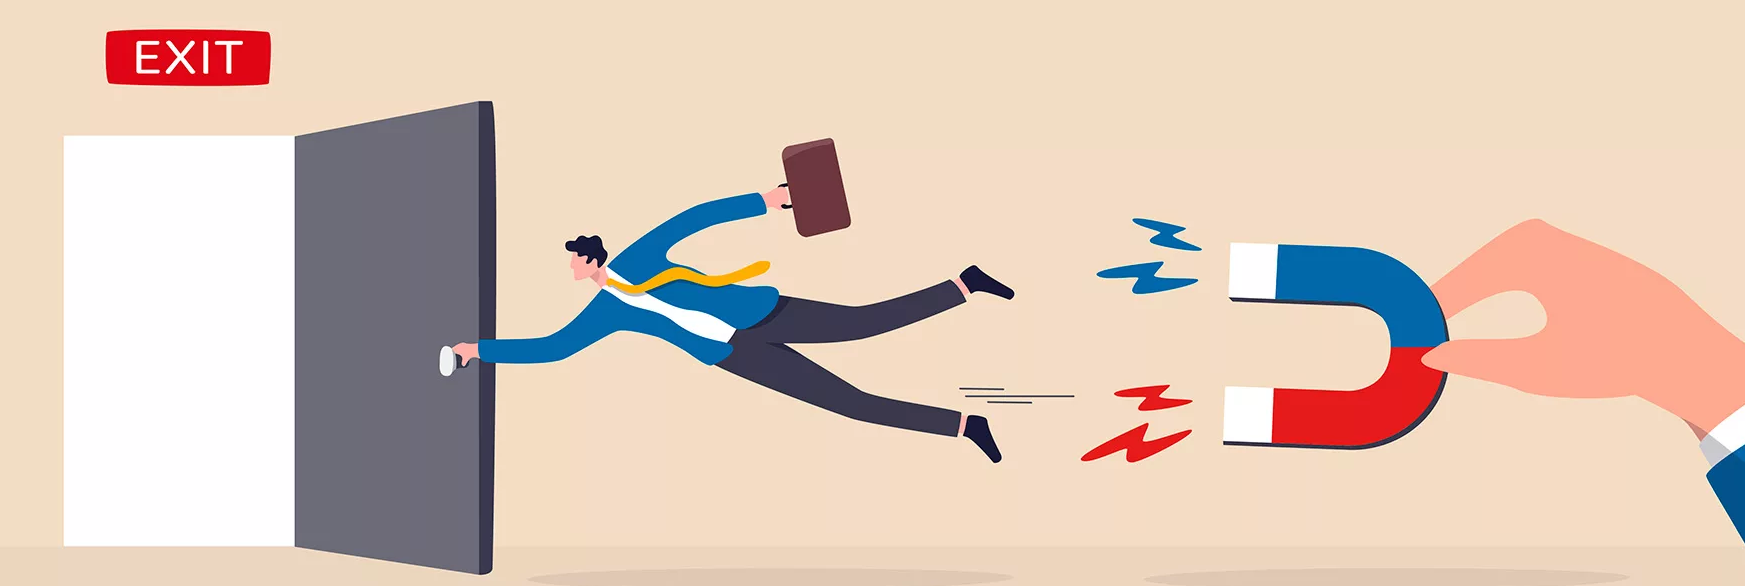

# <font color='green' style='font-size: 30px;'> 1.1) Detecção dos Clientes que podem ter TARGET - Seleção de apenas amostra com ao menos 1 mês como cliente</font>
<hr style='border: 2px solid green;'>

> 1. Como a base possui muitos clientes, decidiu-se avaliar quais já contraram a assinatura em um mês pelo menos.

> 2. Clientes que nunca contraram nunca foram ativos, logo, não deveriam entrar no nosso modelo de Churn


In [2]:
tabela_de_membros = pd.read_parquet('../00_DataMaster/data/members.parquet')[["msno", "safra", "is_ativo"]]
membros_que_tem_pelo_menos_uma_marcacao_de_ativo = tabela_de_membros.groupby("msno", as_index = False)["is_ativo"].sum().rename({"is_ativo":"quantidade_de_meses_de_atividade"}, axis = 1)
membros_que_tem_pelo_menos_uma_marcacao_de_ativo = membros_que_tem_pelo_menos_uma_marcacao_de_ativo.loc[membros_que_tem_pelo_menos_uma_marcacao_de_ativo["quantidade_de_meses_de_atividade"] > 0]

quantidade_de_meses_de_atividade = int(membros_que_tem_pelo_menos_uma_marcacao_de_ativo["msno"].nunique())

print(f"A quantidade de clientes com pelo menos um mês de assinatura é {quantidade_de_meses_de_atividade}")

A quantidade de clientes com pelo menos um mês de assinatura é 1563999


# <font color='green' style='font-size: 30px;'> 1.2) Amostragem Aleatória de 30% do Público para desenvolvimento do Case - Apenas clientes que foram ativos em pelo menos 1 mês </font>
<hr style='border: 2px solid green;'>

> 1. Como o case apresenta em torno de 1.5MM de clientes que já contraram uma assinatura, decidiu-se aplicar uma amostragem aleatória de 30% do público para o desenvolvimento

> 2. A justificativa de criar uma amostra se dá pelo fato da base verdadeira ser muito grande, impossibilitando de ser trabalhada em sua totalidade por limitações de hardware

> 3. Pela Lei dos Grandes Números, sabe-se que à medida que o tamanho da amostra aumenta, o valor esperado das observações da amostra se aproxima do valor esperado da população.

> 4. Sendo assim, pelo tamanho suficiente da amostra, sabe-se que ela assemelha-se muito a população, garantindo que todo o case possa ser analisado através de uma amostra.


In [3]:
amostra_aleatoria = membros_que_tem_pelo_menos_uma_marcacao_de_ativo[["msno"]].drop_duplicates().sample(frac = 0.3, random_state = 42, replace = False)
amostra_aleatoria.to_parquet("../00_DataMaster/data/amostra_aleatoria.parquet", index = False)

# <font color='green' style='font-size: 30px;'> 1.3) Criação da Target</font>
<hr style='border: 2px solid green;'>

> 1. Para a criação da Target, avaliou-se se o cliente era ativo em M e deixou de ser ou em M+1, M+2 ou M+3

> 2. Posteriormente, excluiu-se da amostra as observações de clientes inativos, pois elas não possuem informações relevantes

> 3. Além disso, decidiu-se retirar do desenvolvimento do case as amostras da safra 2016-12-01, pois elas não possuem Target e, portanto, não podemos avaliar nenhum tipo de performance em cima desses casos

In [4]:
### Amostra de Desenvolvimento + Base de Membros
amostra_aleatoria = pd.read_parquet("../00_DataMaster/data/amostra_aleatoria.parquet")
tabela_de_membros = pd.read_parquet('../00_DataMaster/data/members.parquet')[["msno", "safra", "is_ativo"]]

### Puxando Informações de safra e atividade para a amostra
amostra_aleatoria_com_target = amostra_aleatoria.merge(tabela_de_membros, on = ["msno"], how = "left").sort_values(by = ["msno", "safra"], ascending = True)
#amostra_aleatoria_com_target['safra'] = pd.to_datetime(amostra_aleatoria_com_target['safra'], format='%Y%m')

# Criar as colunas de verificação para os próximos 3 meses
amostra_aleatoria_com_target['ativo_M+1'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-1)
amostra_aleatoria_com_target['ativo_M+2'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-2)
amostra_aleatoria_com_target['ativo_M+3'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-3)

# MARCAÇÃO DE CHURN E NÃO CHURN
amostra_aleatoria_com_target["churn"] = np.where(
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+1'] == 0) | 
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+2'] == 0) |
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+3'] == 0),
    1,  ### MARCAÇÃO DE CHURN
    0   ### MARCAÇÃO DE NÃO CHURN
)

amostra_aleatoria_com_target.tail(12)

,msno,safra,is_ativo,ativo_M+1,ativo_M+2,ativo_M+3,churn
2807397,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201601,1,1.00,0.00,0.00,1
2807407,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201602,1,0.00,0.00,0.00,1
2807402,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201603,0,0.00,0.00,0.00,0
2807406,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201604,0,0.00,0.00,1.00,0
2807401,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201605,0,0.00,1.00,1.00,0
2807403,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201606,0,1.00,1.00,1.00,0
2807398,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201607,1,1.00,1.00,1.00,0
2807396,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201608,1,1.00,1.00,1.00,0
2807404,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201609,1,1.00,1.00,1.00,0
2807400,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201610,1,1.00,1.00,NaN,0


# <font color='green' style='font-size: 30px;'> 1.4) Análise da Target</font>
<hr style='border: 2px solid green;'>

> 1. Como exposto nos gráficos abaixo, a distribuição entre clientes com CHURN e sem CHURN não é proporcional, portanto, estaremos lidando com um problema de desbalanceamento de classes e isso deverá ser tratado futuramente

> 2. Percebe-se também a presença de uma volatilidade na distribuição de Churn ao longo das safras, principalmente nos três primeiros meses

> 3. O motivo dessa volatidade provavelmente é um Mix de Público. Nos dois primeiros meses realmente houve mais casos com churn, todavia, havia também menos clientes, por isso que a distribuição de churn ficou muito alta nos dois primeiros meses 

> 4. Um fenômeno similar de aumento de churn também ocorre nos dois últimos meses, contudo, dessa vez há bem mais clientes, resultando na não volatilidade de distribuição de Churn para esses casos 

> 5. Decidiu-se eliminar as observações de clientes marcados como inativos pois eles não fornecem informação útil e podem poluir a análise (clientes que não são ativos são marcados como não churn, mas ele sequer é cliente!)


In [5]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo, rotation):        

    k = 0
    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
    ax.set_title(f'{titulo}')
    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
    ax.set_ylabel(f'Quantidade', fontsize = 14)
    total = []
    for bar in ax.patches:
        height = bar.get_height()
        total.append(height)
    total = builtins.sum(total)
    
    sizes = []
    for bar in ax.patches:
        height = bar.get_height()
        sizes.append(height)
        ax.text(bar.get_x() + bar.get_width()/1.6,
                height,
                f'{builtins.round((height/total)*100, 2)}%',
                ha = 'center',
                fontsize = 12
        )
    ax.set_ylim(0, builtins.max(sizes)*1.1)
    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation = rotation, ha='right', fontsize=10)
    # Formatação manual dos rótulos do eixo y para remover a notação científica
    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
    # Adicionamos os nomes das categorias no eixo x
    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)

In [6]:
def plota_grafico_linhas(df, x, y, nao_calcula_media, title):

    if nao_calcula_media:
        # Criando o gráfico de linha
        plt.figure(figsize=(10, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        media = df[y].mean()
        # Criando o gráfico de linha
        plt.figure(figsize=(10, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando linha da média
        plt.axhline(y=media, color='r', linestyle='--', linewidth=1, label=f'Média: {media:.2f}')
        plt.legend()

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

A quantidade de amostras com Churn é 484523
A quantidade de amostras sem Churn é 2598854


,safra,churn,msno,total_churn,total_msno,%churn_por_safra,%churn,%msno
0,201601,59347,267356,484523,3083377,22.20,12.25,8.67
1,201602,60977,276181,484523,3083377,22.08,12.58,8.96
2,201603,46417,262033,484523,3083377,17.71,9.58,8.50
3,201604,32310,249667,484523,3083377,12.94,6.67,8.10
4,201605,35702,255188,484523,3083377,13.99,7.37,8.28
5,201606,32909,253972,484523,3083377,12.96,6.79,8.24
6,201607,39910,290877,484523,3083377,13.72,8.24,9.43
7,201608,41452,294495,484523,3083377,14.08,8.56,9.55
8,201609,42751,297722,484523,3083377,14.36,8.82,9.66
9,201610,48938,314728,484523,3083377,15.55,10.10,10.21


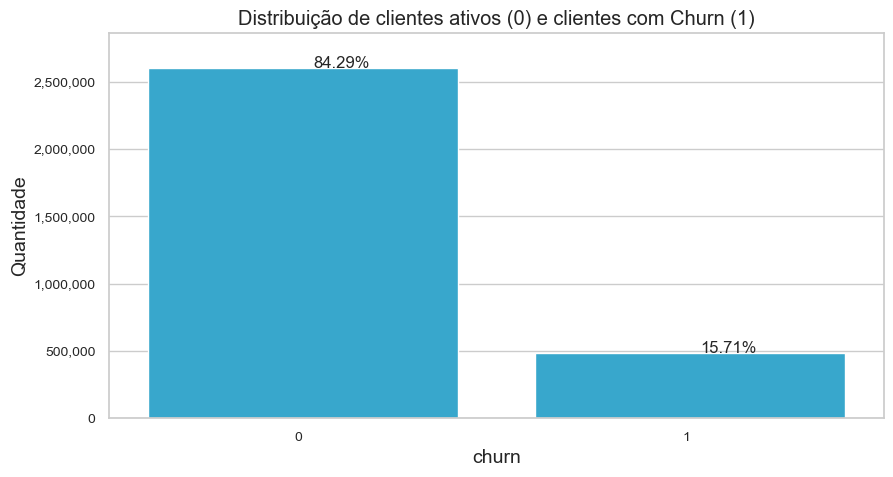

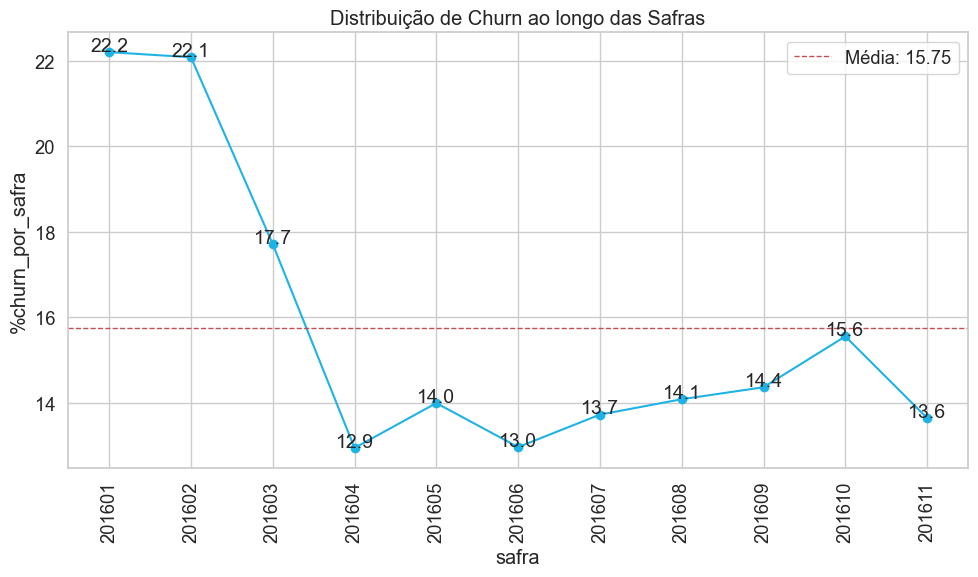

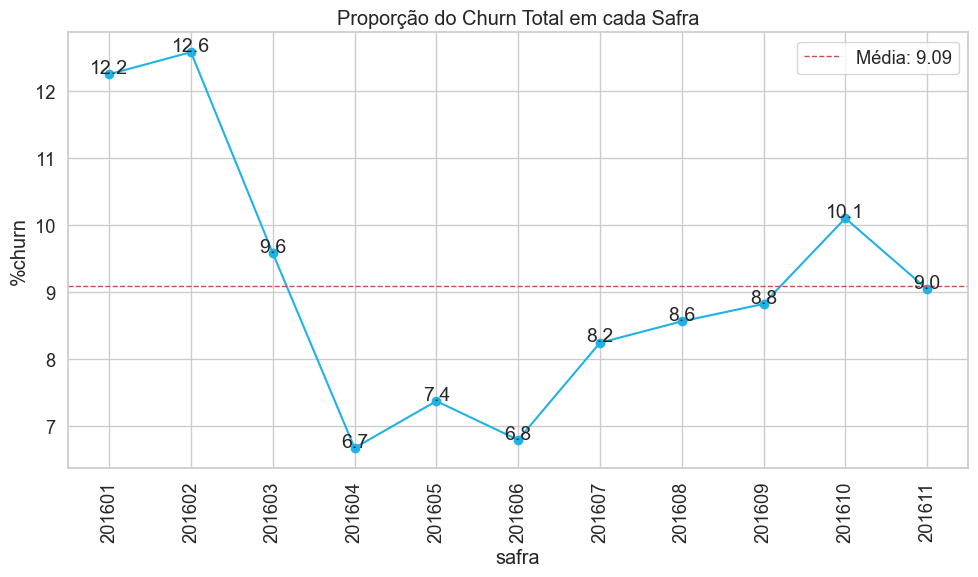

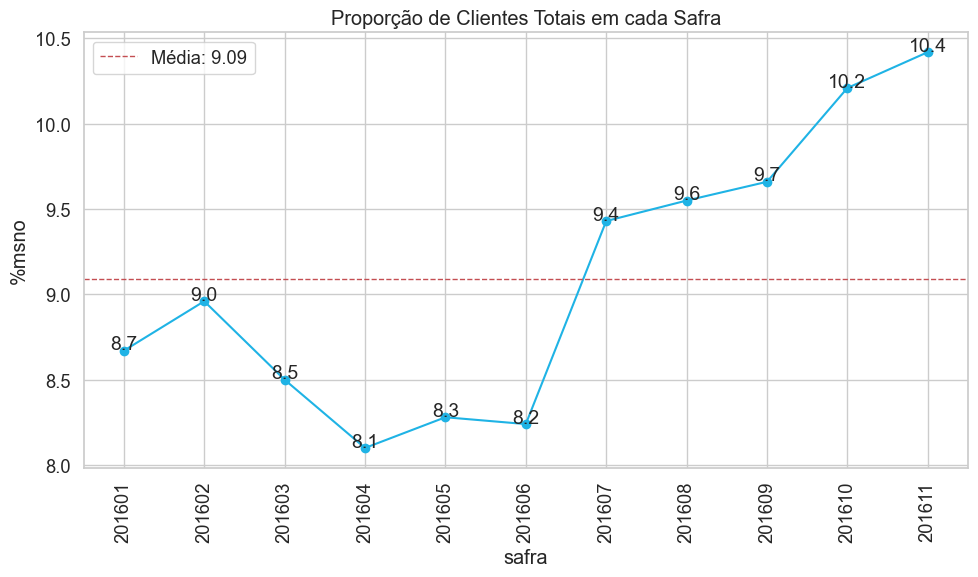

In [7]:
# RETIRANDO A SAFRA DE 2016-12-01 POIS ELA NÃO POSSUI TARGET

amostra_aleatoria_com_target = amostra_aleatoria_com_target.loc[(amostra_aleatoria_com_target["safra"] != "201612") & (amostra_aleatoria_com_target["is_ativo"] == 1)]
#amostra_aleatoria_com_target["safra"] = amostra_aleatoria_com_target["safra"].apply(lambda x: x.strftime('%Y%m'))

# VOLUMETRIA
quantidade_de_amostras_com_churn = amostra_aleatoria_com_target.loc[amostra_aleatoria_com_target["churn"] == 1].shape[0]
quantidade_de_amostras_sem_churn = amostra_aleatoria_com_target.loc[amostra_aleatoria_com_target["churn"] == 0].shape[0]

print(f"A quantidade de amostras com Churn é {quantidade_de_amostras_com_churn}")
print(f"A quantidade de amostras sem Churn é {quantidade_de_amostras_sem_churn}")

plota_barras(['churn'], False, amostra_aleatoria_com_target, 1, 1, 'Distribuição de clientes ativos (0) e clientes com Churn (1)', 0)

# VOLUMETRIA AO LONGO DAS SAFRAS
churn_por_safra = amostra_aleatoria_com_target[["msno", "safra", "churn"]].groupby("safra").agg({"churn":"sum", "msno":"count"}).reset_index()
churn_por_safra["total_churn"] = churn_por_safra["churn"].sum()
churn_por_safra["total_msno"] = churn_por_safra["msno"].sum()
churn_por_safra["%churn_por_safra"] = round(churn_por_safra["churn"]/churn_por_safra["msno"]*100, 2)
churn_por_safra["%churn"] = round((churn_por_safra["churn"]/churn_por_safra["total_churn"])*100, 2)
churn_por_safra["%msno"] = round((churn_por_safra["msno"]/churn_por_safra["total_msno"])*100, 2)
display(churn_por_safra)
plota_grafico_linhas(churn_por_safra, "safra", "%churn_por_safra", False, "Distribuição de Churn ao longo das Safras")
plota_grafico_linhas(churn_por_safra, "safra", "%churn", False, "Proporção do Churn Total em cada Safra")
plota_grafico_linhas(churn_por_safra, "safra", "%msno", False, "Proporção de Clientes Totais em cada Safra")

In [8]:
amostra_aleatoria_com_target[["msno", "safra", "churn"]].to_parquet("../00_DataMaster/data/amostra_aleatoria_com_target.parquet", index = False)

<font color='red' style='font-size: 40px;'> 2) Seleção das Amostras de Treinamento, Validação, Teste e OOT </font>
<hr style='border: 2px solid red;'>

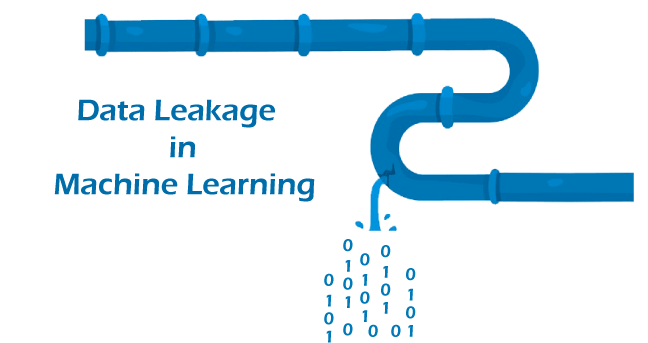

# <font color='green' style='font-size: 30px;'> 2.1) Puxando informações para a amostra aleatória </font>
<hr style='border: 2px solid green;'>

> 1. Como selecionamos uma amostra aleatória, devemos puxar as demais variáveis para iniciarmos efetivamente o case

> 2. Embora hajam safras mais antigas para as tabelas de Transações e User Logs, para as análises iniciais, optou-se por garantir manter as variáveis no mesmo intervalo temporal da Target (201601~201611)


In [9]:
# Amostra Aleatória
amostra_aleatoria_com_target = pd.read_parquet("../00_DataMaster/data/amostra_aleatoria_com_target.parquet")
amostra_aleatoria_com_target["safra"] = amostra_aleatoria_com_target["safra"].apply(lambda x:str(x))

# Tabela de Membros
tabela_de_membros = pd.read_parquet("../00_DataMaster/data/members.parquet").drop("is_ativo", axis = 1)
tabela_de_membros["safra"] = tabela_de_membros["safra"].apply(lambda x:str(x))

# Tabela de Transações
tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes.loc[tabela_de_transacoes["safra"].isin(['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609', '201610', '201611'])]

# Tabela de User Logs
tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs.loc[tabela_user_logs["safra"].isin(['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609', '201610', '201611'])]


In [10]:
df_case_data_masters = amostra_aleatoria_com_target.merge(tabela_de_membros, on = ["msno", "safra"], how = "left")
df_case_data_masters = df_case_data_masters.merge(tabela_de_transacoes, on = ["msno", "safra"], how = "left")
df_case_data_masters = df_case_data_masters.merge(tabela_user_logs, on = ["msno", "safra"], how = "left")

In [11]:
df_case_data_masters

,msno,safra,churn,registration_init_time,city,bd,gender,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201611,0,20140608,1,0,None,7,41,30,99,99,1,20161116,20161215,0,128.00,71.00,50.00,101.00,470.00,488.00,148668.07
1,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,201603,0,20160315,18,21,male,7,41,30,149,149,1,20160315,20160415,0,52.00,7.00,16.00,20.00,273.00,101.00,76357.19
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,201604,0,20160315,18,21,male,7,41,30,149,149,1,20160415,20160515,0,245.00,56.00,50.00,92.00,858.00,917.00,248566.52
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,201605,0,20160315,18,21,male,7,41,30,149,149,1,20160515,20160615,0,156.00,37.00,28.00,21.00,343.00,363.00,101241.81
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,201606,0,20160315,18,21,male,7,41,30,149,149,1,20160615,20160715,0,122.00,40.00,25.00,26.00,604.00,365.00,168964.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083372,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201607,0,20140611,4,48,female,9,39,30,149,149,1,20160731,20160924,0,13.00,3.00,2.00,4.00,119.00,132.00,32597.06
3083373,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201608,0,20140611,4,48,female,9,39,30,149,149,1,20160831,20161024,0,33.00,14.00,4.00,4.00,135.00,142.00,37684.99
3083374,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201609,0,20140611,4,48,female,9,39,30,149,149,1,20160930,20161124,0,77.00,17.00,10.00,6.00,113.00,189.00,36214.65
3083375,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,201610,0,20140611,4,48,female,9,39,30,149,149,1,20161031,20161224,0,17.00,3.00,3.00,1.00,66.00,85.00,18055.72


In [12]:
df_case_data_masters.to_parquet("../00_DataMaster/data/df_case_data_masters.parquet", index = False)

# <font color='green' style='font-size: 30px;'> 2.2) Separação em Treino, Validação, Teste e OOT </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 201602 e 201610, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 201601 e 201611,

> 3. Escolheu-se treinar o modelo com 201602 ~ 201610 para termos a presença de uma safra com churn atípico (201602) e safras com churn relativamente constante; ao passo que 201601 e 201611 ficaram como OOT para avaliarmos se o modelo performa bem em cenários atípicos e constantes

### Considerações

-  '201601', --> OOT
-  '201602', --> TRAINING/TESTE
-  '201603', --> TRAINING/TESTE
-  '201604', --> TRAINING/TESTE
-  '201605', --> TRAINING/TESTE
-  '201606', --> TRAINING/TESTE
-  '201607', --> TRAINING/TESTE
-  '201608', --> TRAINING/TESTE
-  '201609', --> TRAINING/TESTE
-  '201610', --> TRAINING/TESTE
-  '201611', --> OOT
-  '201612' --> Não tem Target

In [13]:
amostra_treino_validacao = (
    df_case_data_masters
        .loc[~df_case_data_masters["safra"].isin(["201601", "201611"])]
        [["msno"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["msno"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["msno"].isin(list(train["msno"].unique()))]
    [["msno"]]
    .drop_duplicates()
)

test = (
    df_case_data_masters
        .loc[
            (~df_case_data_masters["safra"].isin(["201601", "201611"])) & 
            (~df_case_data_masters["msno"].isin(list(train["msno"].unique()))) & 
            (~df_case_data_masters["msno"].isin(list(valid["msno"].unique())))
        ]
        [["msno"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

oot = (
    df_case_data_masters
        .loc[df_case_data_masters["safra"].isin(["201601", "201611"])]
        [["msno"]]
        .drop_duplicates()
)


print(f"A quantidade de IDs distintos no Treino (201602~201610) é: {train.shape[0]}")
print(f"A quantidade de IDs distintos na Validação (201602~201610) é: {valid.shape[0]}")
print(f"A quantidade de IDs distintos no Teste (201602~201610) é: {test.shape[0]}")
print(f"A quantidade de IDs distintos no OOT (201601 e 201611) é: {oot.shape[0]}")



A quantidade de IDs distintos no Treino (201602~201610) é: 296011
A quantidade de IDs distintos na Validação (201602~201610) é: 32890
A quantidade de IDs distintos no Teste (201602~201610) é: 65780
A quantidade de IDs distintos no OOT (201601 e 201611) é: 387953


In [14]:
df_train = train.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201611"])], on = "msno", how = "left")
df_valid = valid.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201611"])], on = "msno", how = "left")
df_test = test.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201611"])], on = "msno", how = "left")
df_oot = oot.merge(df_case_data_masters.loc[df_case_data_masters["safra"].isin(["201601", "201611"])], on = "msno", how = "left")

print(f"A quantidade de amostras no Treino (201602~201610) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (201602~201610) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (201602~201610) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (201601 & 201611) é: {df_oot.shape[0]}")

A quantidade de amostras no Treino (201602~201610) é: 1796783
A quantidade de amostras na Validação (201602~201610) é: 199755
A quantidade de amostras no Teste (201602~201610) é: 398218
A quantidade de amostras no OOT (201601 & 201611) é: 588514


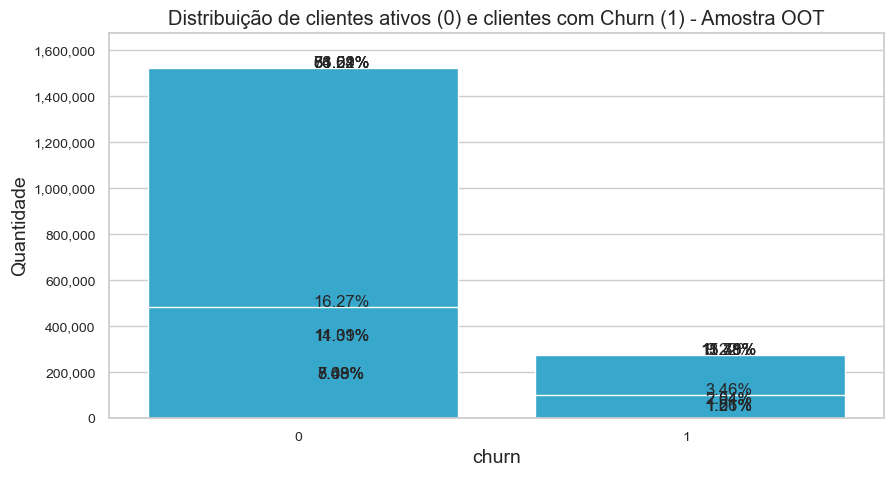

In [15]:
amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]
i = 0
for amostra in amostras:

    plota_barras(['churn'], False, amostra, 1, 1, f'Distribuição de clientes ativos (0) e clientes com Churn (1) - Amostra {tipo[i]}', 0)

    i = i + 1

In [16]:
df_train.to_parquet("../00_DataMaster/data/df_train.parquet", index = False)
df_valid.to_parquet("../00_DataMaster/data/df_valid.parquet", index = False)
df_test.to_parquet("../00_DataMaster/data/df_test.parquet", index = False)
df_oot.to_parquet("../00_DataMaster/data/df_oot.parquet", index = False)

<font color='red' style='font-size: 40px;'> 3)  Análise Exploratória - Feita apenas com a Amostra de **TREINO**</font>
<hr style='border: 2px solid red;'>

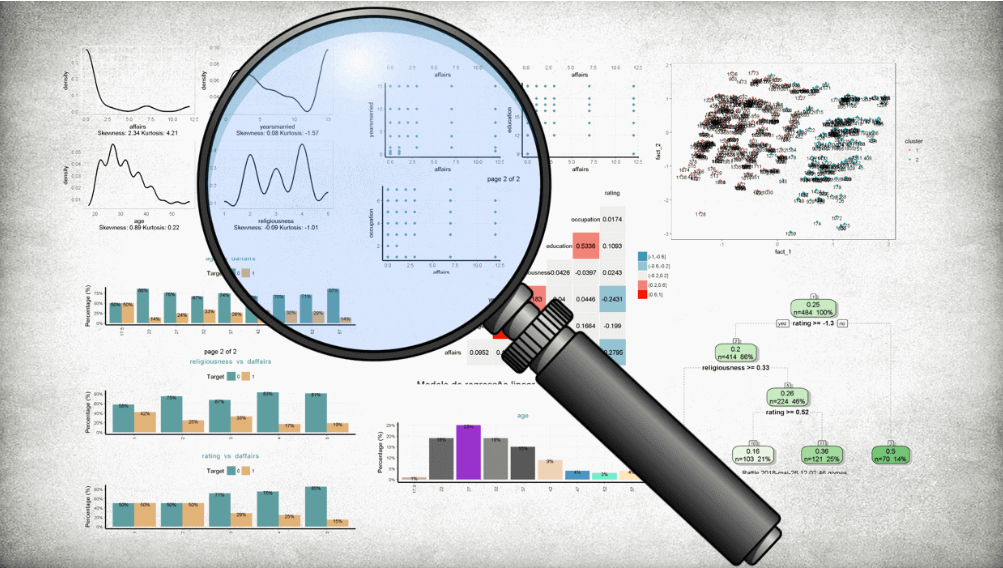

In [93]:
df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")
df_valid = pd.read_parquet("../00_DataMaster/data/df_valid.parquet")
df_test = pd.read_parquet("../00_DataMaster/data/df_test.parquet")
df_oot = pd.read_parquet("../00_DataMaster/data/df_oot.parquet")

colunas_ordenadas = [
    "msno", "churn", "safra", 'is_cancel',
    'is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id', 
    'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
    "registration_init_time", "transaction_date", "membership_expire_date"
] 

df_train = df_train[colunas_ordenadas]
df_valid = df_valid[colunas_ordenadas]
df_test = df_test[colunas_ordenadas]
df_oot = df_oot[colunas_ordenadas]

# <font color='green' style='font-size: 30px;'> 3.1) Identificação de tipos de variáveis </font>
<hr style='border: 2px solid green;'>

> 1. Inicialmente, decidiu-se analisar quantos valores distintos há em cada variável

> 2. Variáveis com menos valores distintos tendem a ser categóricas, ao passo que muitos valores distintos tendem a ser contínuas

> 3. Além disso, somado a descrição da variável, pode-se inferir seu tipo com mais acurácia

> 4. Notou-se também que algumas variáveis estão em um formato não condizente (idade em string, por exemplo). Para corrigir isso, modificou-se o tipo das variáveis de maneira a corrigí-las.

> 5. Sendo assim, definiu-se que:

- variaveis_categoricas = ['is_auto_renew', 'is_cancel', 'gender', 'registered_via', 'city', 'payment_method_id']
- variaveis_continuas = ['payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']
- variaveis_de_data = ["registration_init_time", "transaction_date", "membership_expire_date"]
- safra = ["safra"]
- target = ["churn"]
- user_id = ["msno"]

- Identificação do tipo de cada variável

In [94]:
# Dados das variáveis e suas descrições
data = {
    'base': [
        'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members',
        'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions',
        'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs'
    ],
    'variavel': [
        'msno', 'city', 'bd', 'registered_via', 'registration_init_time', 'gender', 'is_ativo', 'safra',
        'msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'transaction_date', 'membership_expire_date', 'is_cancel',
        'msno', 'safra', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'
    ],
    'descricao': [
        'user id', 'cidade', 'idade --> essa coluna tem outliers desde -7000 até 2015', 'tipo de registro', 'data do registro inicial no formato %Y%m%d', 'gênero', 'assinatura ativa (Target Classificador Problema 1)', 'safra',
        'user id', 'método de pagamento', 'quantidade de dias de afiliação', 'preço', 'montante pago', 'flag renovação automática', 'data da transação no formato %Y%m%d', 'data de expiração da afiliação', 'flag que indica se o usuário cancelou ou não a afiliação nesta transação',
        'user id', 'safra', 'quantidade de músicas tocadas por menos de 25% da duração da música', 'quantidade de músicas tocadas entre 25% e 50% da duração da música', 'quantidade de músicas tocadas entre 50% e 75% da duração da música', 'quantidade de músicas tocadas entre 75% até 98.5% da duração da música', 'quantidade de músicas tocadas entre 98.5% até 100% da duração da música', 'quantidade única de músicas já tocadas', 'numero total de segundos tocados'
    ]
}

df_variaveis_descricoes = pd.DataFrame(data)

# Dados dos tipos das variáveis
target = ["churn"]
user_id = ["msno"]
variaveis_de_data = ["safra", "registration_init_time", "transaction_date", "membership_expire_date"]
variaveis_categoricas_continuas = {}

for var in df_train.drop(target + user_id + variaveis_de_data, axis=1).columns:
    variaveis_categoricas_continuas[var] = int(df_train[var].nunique())

variaveis_categoricas_continuas_df = pd.DataFrame(list(variaveis_categoricas_continuas.items()), columns=['variavel', 'numero_valores_unicos']).sort_values(by = "numero_valores_unicos", ascending = True)
variaveis_categoricas_continuas_df = variaveis_categoricas_continuas_df.merge(df_variaveis_descricoes, on = "variavel", how = "left")

display(variaveis_categoricas_continuas_df)
display(pd.DataFrame(df_train.dtypes).reset_index().rename({"index":"variavel", 0:"tipagem"}, axis = 1))


,variavel,numero_valores_unicos,base,descricao
0,is_cancel,2,Base Transactions,flag que indica se o usuário cancelou ou não a afiliação nesta transação
1,is_auto_renew,2,Base Transactions,flag renovação automática
2,gender,2,Base Members,gênero
3,registered_via,6,Base Members,tipo de registro
4,city,21,Base Members,cidade
5,payment_plan_days,27,Base Transactions,quantidade de dias de afiliação
6,payment_method_id,35,Base Transactions,método de pagamento
7,plan_list_price,40,Base Transactions,preço
8,actual_amount_paid,41,Base Transactions,montante pago
9,bd,165,Base Members,idade --> essa coluna tem outliers desde -7000 até 2015


,variavel,tipagem
0,msno,object
1,churn,int32
2,safra,object
3,is_cancel,object
4,is_auto_renew,object
5,gender,object
6,registered_via,object
7,city,object
8,payment_method_id,object
9,payment_plan_days,object


In [103]:
def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]


In [104]:
df_train["is_auto_renew"] = changing_feature_type(df_train, "is_auto_renew", "int")
df_train["is_cancel"] = changing_feature_type(df_train, "is_cancel", "int")
df_train["bd"] = changing_feature_type(df_train, "bd", "int")

df_train["payment_plan_days"] = changing_feature_type(df_train, "payment_plan_days", "float")
df_train["plan_list_price"] = changing_feature_type(df_train, "plan_list_price", "float")
df_train["actual_amount_paid"] = changing_feature_type(df_train, "actual_amount_paid", "float")

In [100]:
variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
variaveis_continuas = ['payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']
variaveis_de_data = ["registration_init_time", "transaction_date", "membership_expire_date"]
is_cancel = ['is_cancel']
safra = ["safra"]
target = ["churn"]
user_id = ["msno"]

# <font color='green' style='font-size: 30px;'> 3.2) Identificação inconsistências nas variáveis </font>
<hr style='border: 2px solid green;'>

> 1. Muitas variáveis possuem diversos valores nulos

> 2. Ao que tudo indica, existem três tipos de nulos:

- Variáveis cadastrais nulas
- Variáveis de consumo nulas
- Variáveis cadastrais e de consumo nulas

> 3. Na etapa de pré-processamento devemos levar isso em consideração e tratá-los de alguma forma

- Quantidade de registros nulos na base 

Existem 20 variáveis no Dataset
Existem 4 variáveis sem registros nulos no Dataset


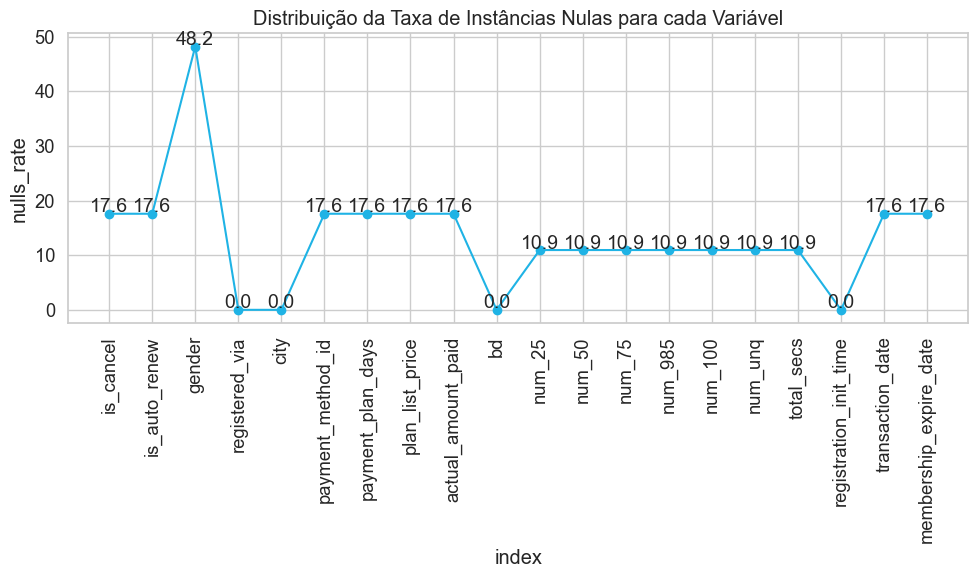

In [101]:
df_nulls = (
    pd.DataFrame(
        df_train
        .drop(["msno", "safra", "churn"], axis = 1)
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_train.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

In [102]:
print("Tipo 1 - Clientes com variáveis 'cadastrais' nulas")
display(df_train.loc[(df_train["actual_amount_paid"].isna()) & (~df_train["num_25"].isna())].head(10))
print()
print("Tipo 2 - Clientes com variáveis 'de consumo' nulas")
display(df_train.loc[(~df_train["actual_amount_paid"].isna()) & (df_train["num_25"].isna())].head(10))
print()
print("Tipo 3 - Clientes com variáveis 'cadastrais' e 'de consumo' nulas")
display(df_train.loc[(df_train["actual_amount_paid"].isna()) & df_train["num_25"].isna()].head(10))

Tipo 1 - Clientes com variáveis 'cadastrais' nulas


,msno,churn,safra,is_cancel,is_auto_renew,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
1,C2EZKxdn8zEHgz6hYkBY5A3eaA4yMDLNABU6x7ZZ4Ec=,1,201603,NaN,NaN,male,3,5,None,NaN,NaN,NaN,21,6.00,4.00,2.00,0.00,52.00,45.00,13265.79,20130309,None,None
21,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,0,201602,NaN,NaN,male,3,13,None,NaN,NaN,NaN,25,33.00,8.00,7.00,5.00,304.00,328.00,78242.59,20130927,None,None
22,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201603,NaN,NaN,male,3,13,None,NaN,NaN,NaN,25,51.00,14.00,15.00,16.00,672.00,702.00,172079.19,20130927,None,None
23,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201604,NaN,NaN,male,3,13,None,NaN,NaN,NaN,25,22.00,8.00,6.00,6.00,274.00,289.00,71155.75,20130927,None,None
24,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201605,NaN,NaN,male,3,13,None,NaN,NaN,NaN,25,18.00,3.00,2.00,3.00,88.00,113.00,22833.38,20130927,None,None
34,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201602,NaN,NaN,male,3,13,None,NaN,NaN,NaN,23,29.00,45.00,30.00,105.00,1430.00,1605.00,402072.29,20121025,None,None
35,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201603,NaN,NaN,male,3,13,None,NaN,NaN,NaN,23,24.00,29.00,22.00,56.00,686.00,775.00,193614.48,20121025,None,None
36,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201604,NaN,NaN,male,3,13,None,NaN,NaN,NaN,23,61.00,40.00,29.00,93.00,991.00,1123.00,286122.33,20121025,None,None
37,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201605,NaN,NaN,male,3,13,None,NaN,NaN,NaN,23,55.00,24.00,15.00,35.00,845.00,794.00,229854.30,20121025,None,None
38,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201606,NaN,NaN,male,3,13,None,NaN,NaN,NaN,23,58.00,38.00,28.00,51.00,763.00,879.00,218402.26,20121025,None,None



Tipo 2 - Clientes com variáveis 'de consumo' nulas


,msno,churn,safra,is_cancel,is_auto_renew,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
31,2Zz3EC+5ydorej3v12/ZCl2d3iTmzmxZCUyTVEiarqA=,0,201608,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150924,20160823,20160923
125,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201603,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160310,20160410
126,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201604,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160410,20160510
127,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201605,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160510,20160610
128,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201606,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160610,20160710
129,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201607,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160710,20160810
130,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201608,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160810,20160910
131,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201609,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160910,20161010
132,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201610,0.00,1.00,None,7,1,41,30.00,99.00,99.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20161010,20161110
168,HkHWje6bdmSvJvuRr8g31ctxIqC+sFvVCl40d/7pl88=,0,201602,0.00,1.00,female,7,6,41,30.00,99.00,99.00,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160223,20160223,20160322



Tipo 3 - Clientes com variáveis 'cadastrais' e 'de consumo' nulas


,msno,churn,safra,is_cancel,is_auto_renew,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
134,e7CTuQdBHhlaQ4wUqyHntGL+kf69Naoyhz/jEgU4NZw=,1,201607,NaN,NaN,None,4,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160528,None,None
327,rCQz4rLwn7ifKSpEAZUG6U1QaAsoirjf55GLlZcOwN4=,1,201602,NaN,NaN,female,9,4,None,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20140721,None,None
441,QprfC0J4yzVhbQs9fxxsXBPyAS5+2QDFB/6gsUTI/oc=,1,201603,NaN,NaN,female,9,11,None,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20040914,None,None
507,K5pbcXFJ0B4Ds/aOcoXP9wD6hpdbhxETx/6P9drNIbE=,1,201609,NaN,NaN,male,7,22,None,NaN,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150102,None,None
545,r/3ubxoCkjG/chsSAwe7a2KgBIykFS6zAx66s1UAmvs=,1,201603,NaN,NaN,None,7,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20151216,None,None
547,WQOTopEHewT0huG/aOnxEmd+MOu0eTljaZIVqD4NPnI=,1,201607,NaN,NaN,None,4,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160609,None,None
709,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201608,NaN,NaN,None,7,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
710,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201609,NaN,NaN,None,7,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
711,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201610,NaN,NaN,None,7,1,None,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
849,UjgwfIzYuEws9C+qpUyU1FF0KewdWby2XWKttaU328o=,1,201606,NaN,NaN,female,9,13,None,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20040918,None,None


# <font color='green' style='font-size: 30px;'> 3.3) Análise de Variáveis Contínuas </font>
<hr style='border: 2px solid green;'>

> 1. Nesta etapa, objetiva-se entender o padrão das variáveis contínuas

> 2. Inicialmente, decidiu-se analisar a distribuição de cada uma delas a fim de entender se há Outliers incomuns (erros) em cada variável. Para isso, pode-se avaliar os percentis de cada variável, excluindo os dois extremos (p1 e p99.8, por exemplo)

> 3. Além disso, podemos entender se existe correlação entre as variáveis, pois se existir e ela for muito forte, uma dessas variáveis poderá ser eliminada durante o processo de treinamento do Modelo

> 4. Finalmente, pode-se avaliar a diferença de distribuição de cada variável em relação aas amostras Churn e Não Churn, pois isso mostraria variáveis com potencial de discriminação entre ambas as classes

- Análise de Distribuição

In [22]:
def analisa_distribuicao_via_percentis(df, variaveis):
    def sublinha_percentis(s):
        is_1_percentile = s.name == '1%'
        is_99_8_percentile = s.name == '99.8%'
        if is_1_percentile or is_99_8_percentile:
            return ['background-color: blue'] * len(s)
        else:
            return [''] * len(s)

    percentis = df[variaveis].describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 0.995, 0.998]).style.apply(sublinha_percentis, axis=1)    

    return percentis

In [23]:
### Retirando amostras nulas para ver a distribuição
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))

analisa_distribuicao_via_percentis(df_eda_continuas, variaveis_continuas)

,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000
mean,31.973121,142.687601,141.919588,14.770118,109.795622,27.359054,17.024314,18.761856,499.840364,493.958415,-219341495067.880463
std,20.774149,89.491837,90.073193,19.951952,170.842415,40.185597,23.394633,35.527715,713.003153,583.168861,46406288179700.570312
min,1.000000,0.000000,0.000000,-51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-18446744073289264.000000
1%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,220.943570
5%,30.000000,99.000000,99.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,12.000000,2222.459100
10%,30.000000,99.000000,99.000000,0.000000,5.000000,1.000000,1.000000,1.000000,21.000000,31.000000,6624.908900
20%,30.000000,99.000000,99.000000,0.000000,13.000000,3.000000,2.000000,2.000000,65.000000,82.000000,19088.863800
30%,30.000000,129.000000,129.000000,0.000000,23.000000,6.000000,4.000000,4.000000,123.000000,146.000000,34918.334400
40%,30.000000,149.000000,149.000000,0.000000,37.000000,10.000000,7.000000,7.000000,192.000000,221.000000,53884.949200


- Análise de Correlação 

In [24]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(10, 5))
    mask = np.triu(np.ones_like(df.corr(method=metodo), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=metodo), vmin=-1, vmax=1, cmap='magma', annot = True, cbar_kws={"shrink": .8}, mask = mask)
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

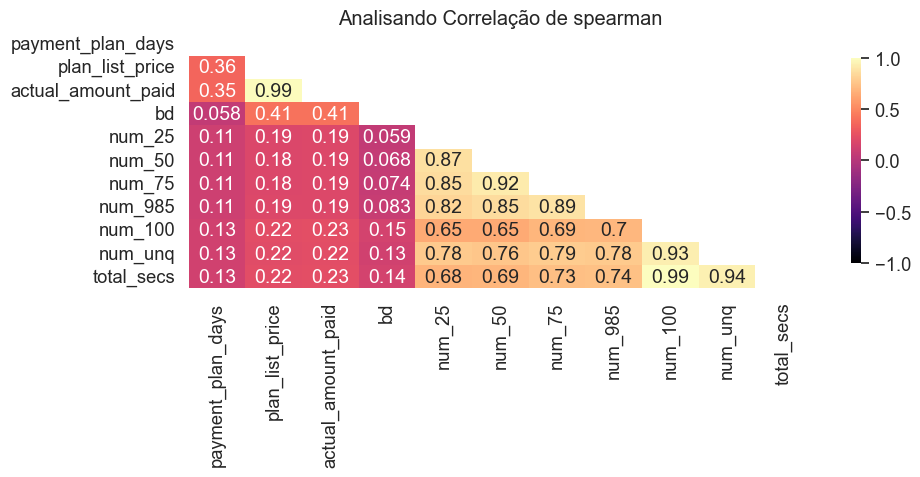

In [25]:
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))
analisa_correlacao("spearman", df_eda_continuas[variaveis_continuas])

- Analisando se há diferença significativa entre clientes Churn e Não Churn 

In [26]:
def compara_medias_amostras(df, variavel):

    def teste_hipotese_z_duas_amostras_independentes(amostra1, amostra2, variavel):
        print(f"Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável '{variavel}'.")
        print(f"Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável '{variavel}'.")
        print()
        
        z_stat, p_value = ztest(amostra1, amostra2)

        alpha = 0.05
        alpha_bicaudal = alpha / 2  

        if p_value < alpha_bicaudal:
            print(f'Pelo Teste de Hipótese Z bicaudal, o p-valor foi de {p_value:.4f}, logo, rejeita-se H0.')
        else:
            print(f'Pelo Teste de Hipótese Z bicaudal, o p-valor foi de {p_value:.4f}, logo, não rejeita-se H0.')


    # Aplica o Teorema do Limite Central, gerando duas distribuições de médias amostras que aproximam-se de uma Normal
    df_com_churn = df.loc[df["churn"] == 1]
    df_sem_churn = df.loc[df["churn"] == 0]

    
    medias_amostrais_com_churn = []
    medias_amostrais_sem_churn = []

    for i in range(10000):
        amostra_churn = random.choices(df_com_churn[variavel].values, k=1000)
        media_amostra_churn = np.mean(amostra_churn)
        medias_amostrais_com_churn.append(media_amostra_churn)

        amostra_sem_churn = random.choices(df_sem_churn[variavel].values, k=1000)
        media_amostra_sem_churn = np.mean(amostra_sem_churn)
        medias_amostrais_sem_churn.append(media_amostra_sem_churn)

    teste_hipotese_z_duas_amostras_independentes(medias_amostrais_com_churn, medias_amostrais_sem_churn, variavel)

    # Plotando os histogramas sobrepostos
    plt.figure(figsize = (8,4))
    plt.hist(medias_amostrais_com_churn, bins=30, alpha=0.5, label='Churn', linewidth=5, color = "red")  # alpha controla a transparência
    plt.hist(medias_amostrais_sem_churn, bins=30, alpha=0.5, label='sem Churn', linewidth=5, color = "green")
    plt.legend()  # Mostra a legenda com os rótulos
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição das Médias Amostrais de "{variavel}" ')
    plt.grid(True)
    plt.show()

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'payment_plan_days'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'payment_plan_days'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


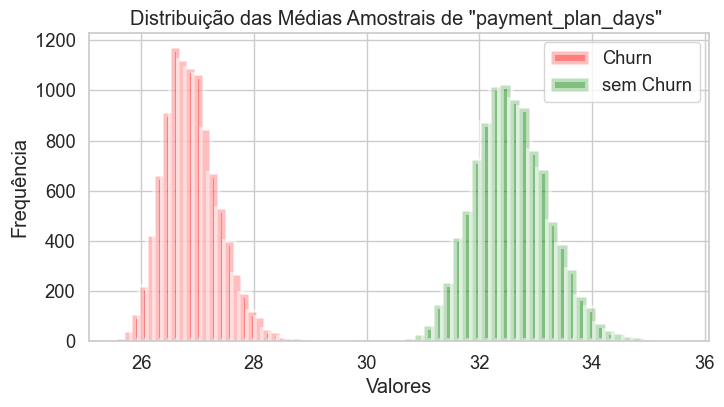

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'plan_list_price'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'plan_list_price'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


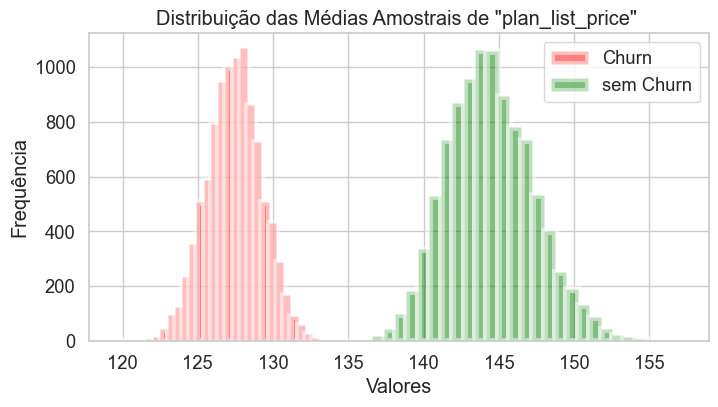

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'actual_amount_paid'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'actual_amount_paid'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


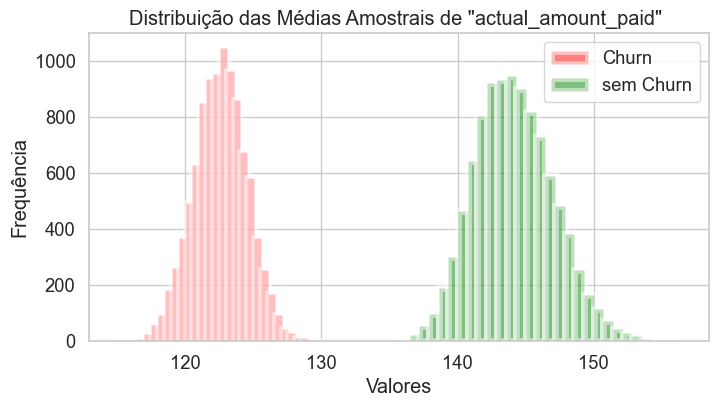

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'bd'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'bd'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


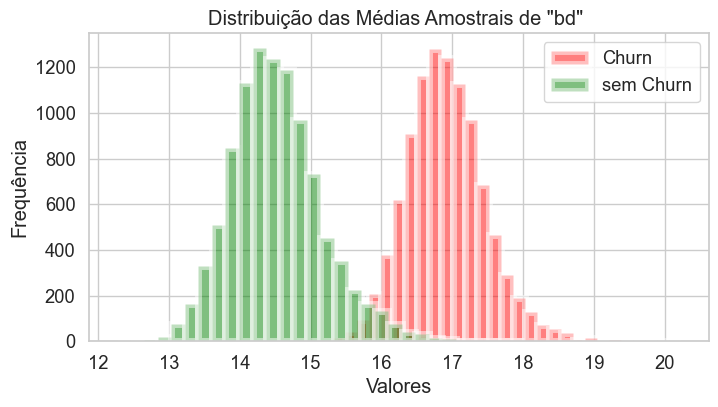

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_25'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_25'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


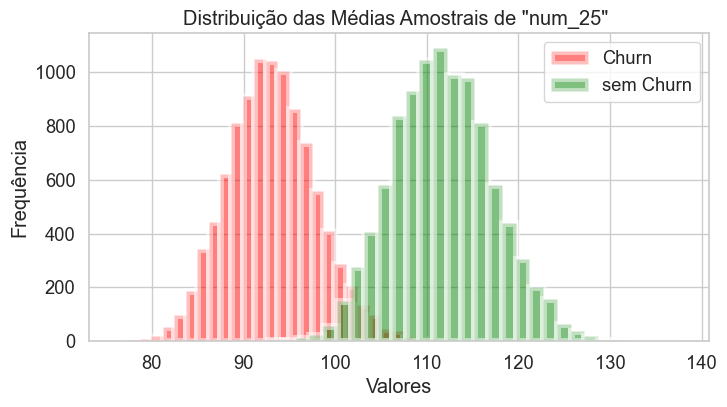

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_50'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_50'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


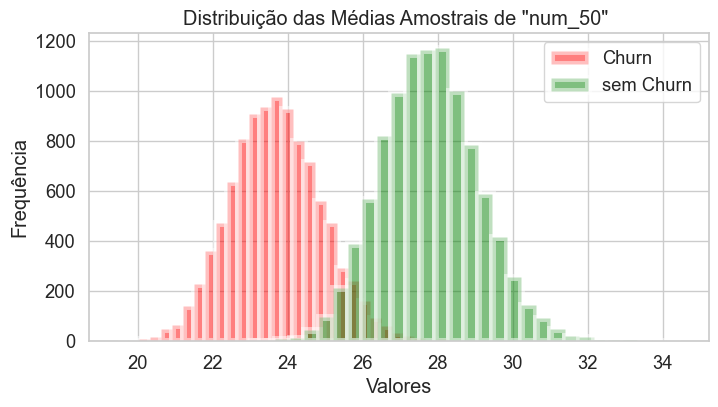

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_75'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_75'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


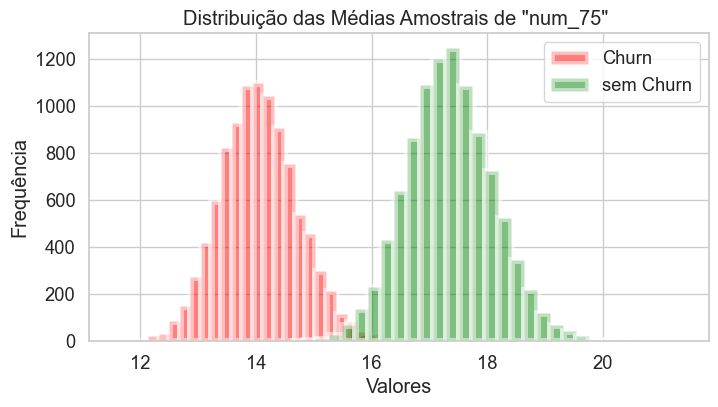

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_985'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_985'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


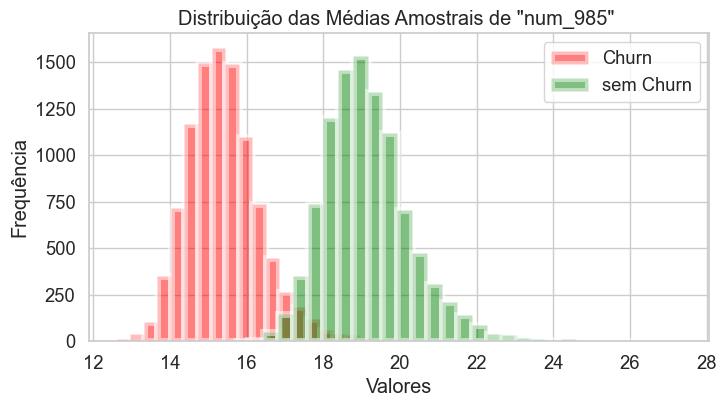

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_100'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_100'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


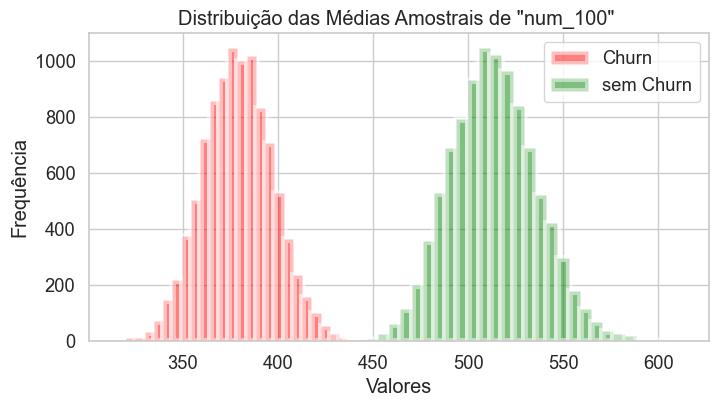

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_unq'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_unq'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


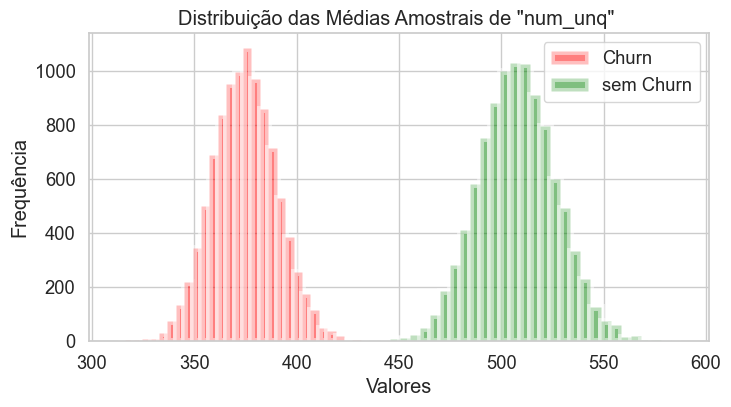

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'total_secs'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'total_secs'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


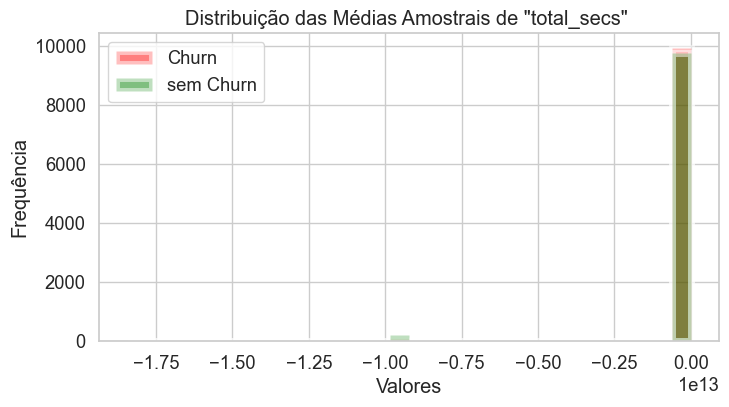

In [88]:
# COrrigindo formato das variáveis
df_eda_continuas = df_train[variaveis_continuas + ["churn"]].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))
    compara_medias_amostras(df_eda_continuas, col)

# <font color='green' style='font-size: 30px;'> 3.4) Análise de Variáveis Categóricas </font>
<hr style='border: 2px solid green;'>

> 1. A respeito da análise de variáveis categóricas, decidiu-se utilizar o WOE (Weight of Evidence). 

> 2. O WOE é uma métrica a qual identifica aassociação entre uma determinada classse e a variável resposta. Neste caso, a classe "A" da variável categórica pode ter ou não uma associação forte em relação ao cliente abandonar a empresa.

> 3. Valores positivos de WOE indicam que a categoria está associada a um maior risco de churn, enquanto valores negativos indicam menor risco

- Análise por Weight of Evidence

In [90]:
def woe(df, feature, target):
    churn = df.loc[df[target] == 1].groupby(feature, as_index = False)[target].count().rename({target:'churn'}, axis = 1)
    sem_churn = df.loc[df[target] == 0].groupby(feature, as_index = False)[target].count().rename({target:'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)
    woe.sort_values(by = 'woe', ascending = True, inplace = True)
    
    weight_of_evidence = woe['woe'].unique()


    x = list(woe[feature])
    y = list(woe['woe'])

    plt.figure(figsize=(10, 4))
    plt.plot(x, y, marker='o', linestyle='--', linewidth=2, color='#1FB3E5')

    for label, value in zip(x, y):
        plt.text(x=label, y=value, s=str(value), fontsize=10, color='red', ha='left', va='center', rotation=45)

    plt.title(f'Weight of Evidence da variável "{feature}"', fontsize=14)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Weight of Evidence', fontsize=14)
    plt.xticks(ha='right', fontsize=10, rotation=45)
    plt.show()

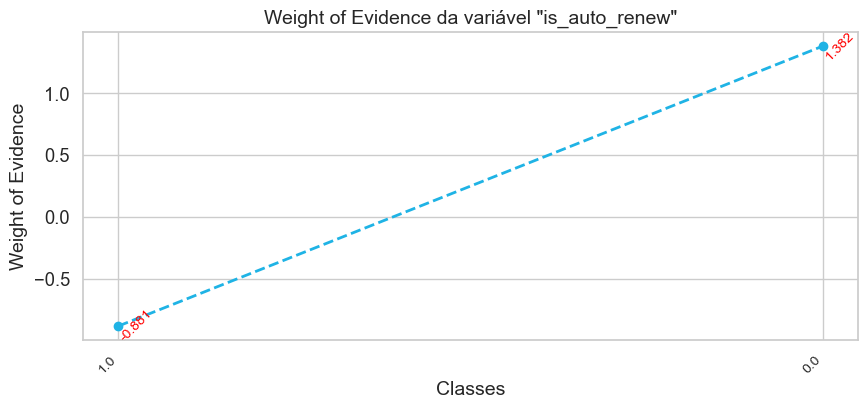

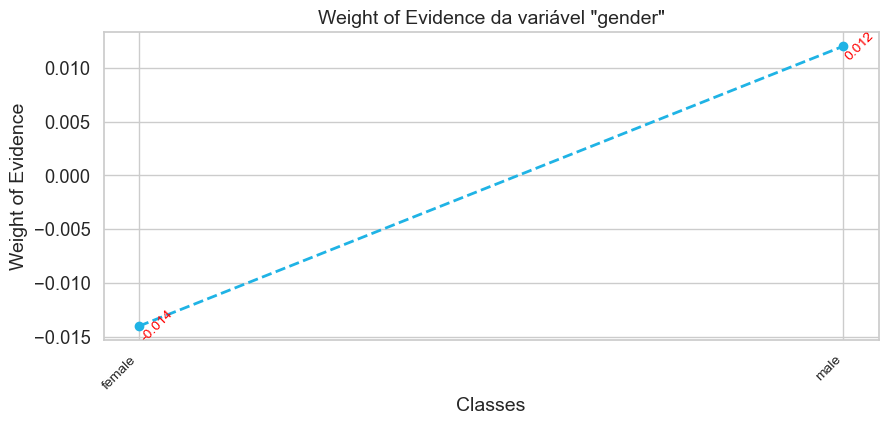

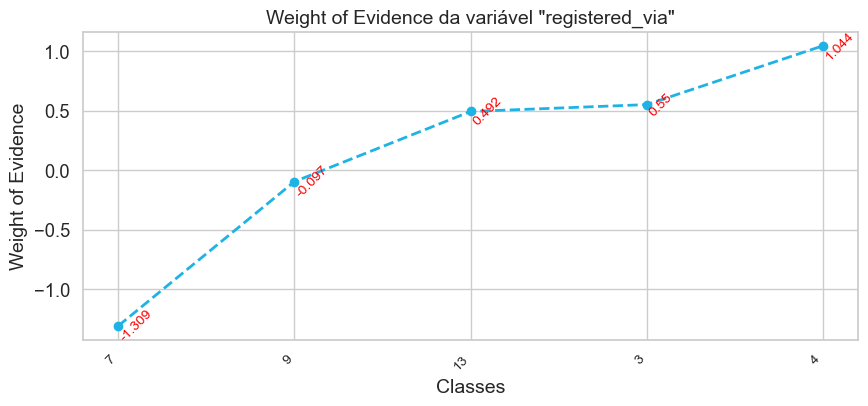

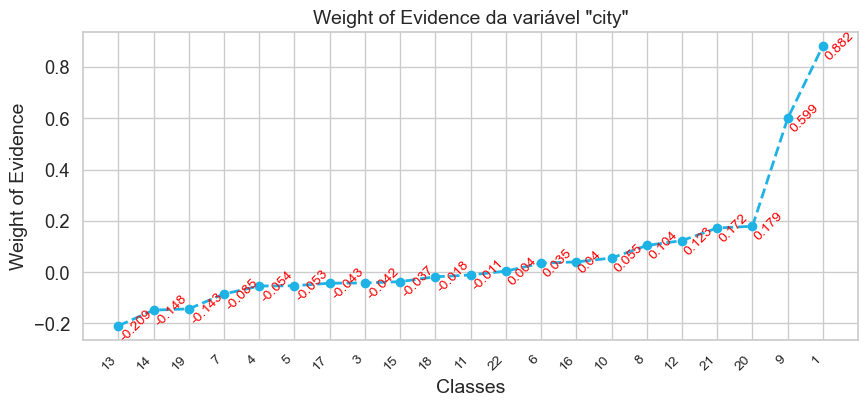

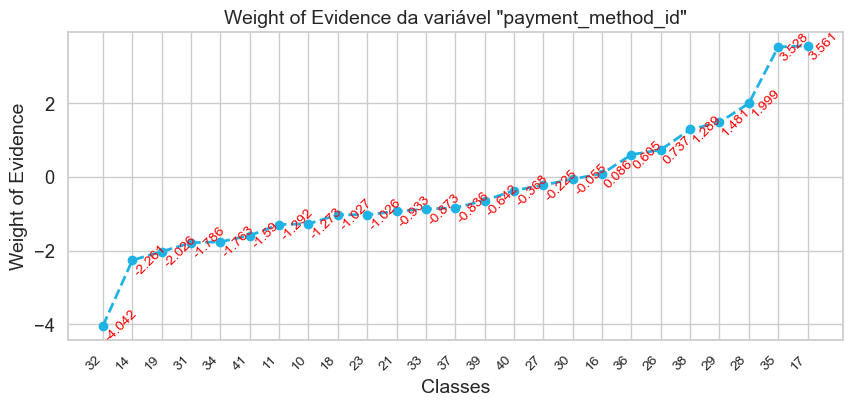

In [91]:
df_eda_categoricas = df_train[variaveis_categoricas + ["churn"]].dropna().copy()
for col in df_eda_categoricas[variaveis_categoricas].columns:
    df_eda_categoricas[col] = df_eda_categoricas[col].apply(lambda x:str(x))
    woe(df_eda_categoricas, col, "churn")

<font color='red' style='font-size: 40px;'> 4)  Feature Engineering </font>
<hr style='border: 2px solid red;'>

### 1) Base Members

> 1. msno: user id

> 2. city: cidade

> 3. bd: idade --> essa coluna tem outliers desde -7000 até 2015

> 4. registered_via: tipo de registro

> 5. registration_init_time: data do registro inicial no formato %Y%m%d

> 6. gender: gênero

> 7. is_ativo: assinatura ativa (Target Classificador Problema 1)

> 8. safra: safra

### 2) Base Transacations

> 1. msno: user id

> 2. payment_method_id: método de pagamento

> 3. payment_plan_days: quantidade de dias de afiliação

> 4. plan_list_price: preço

> 5. actual_amount_paid: montante pago

> 6. is_auto_renew: flag renovação automática

> 7. transaction_date: data da transação no formato %Y%m%d

> 8. membership_expire_date: data de expiração da afiliação

> 9. is_cancel: flag que indica se o usuário cancelou ou não a afiliação nesta transação

> 10. safra: safra

### 3) Base User Logs

> 1. msno: user id

> 2. num_25: quantidade de músicas tocadas por menos de 25% da duração da música

> 3. num_50: quantidade de músicas tocadas entre 25% e 50% da duração da música

> 4. num_75: quantidade de músicas tocadas entre 50% e 75% da duração da música

> 5. num_985: quantidade de músicas tocadas entre 75% até 98.5% da duração da música

> 6. num_100: quantidade de músicas tocadas entre 98.5% até 100% da duração da música

> 7. num_unq: quantidade única de músicas já tocadas

> 8. total_scs: número total de segundos tocados

> 9. safra: safra

In [2]:
### Puxando informações de Treino, Validação, Teste e OOT

df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")
df_valid = pd.read_parquet("../00_DataMaster/data/df_valid.parquet")
df_test = pd.read_parquet("../00_DataMaster/data/df_test.parquet")
df_oot = pd.read_parquet("../00_DataMaster/data/df_oot.parquet")


colunas_ordenadas = [
    "msno", "churn", "safra", 
    'is_auto_renew', 'is_cancel', 'gender', 'registered_via', 'city', 'payment_method_id', 
    'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
    "registration_init_time", "transaction_date", "membership_expire_date"
] 

df_train = df_train[colunas_ordenadas]
df_valid = df_valid[colunas_ordenadas]
df_test = df_test[colunas_ordenadas]
df_oot = df_oot[colunas_ordenadas]

# <font color='green' style='font-size: 30px;'> 4.1) Feautre 1 - Quantidade de meses desde a data de registro  </font>
<hr style='border: 2px solid green;'>

> 1. Podemos avaliar a data de registro do cliente e entender quais são clientes que estão registrados há muito tempo, assim como os novos clientes 

> 2. Pode ser que o tempo de registro nos traga alguma informação interessante

In [3]:
def months_as_a_registered(df):

    df["registration_init_time"] = df["registration_init_time"].apply(lambda x:str(x)[:6])

    # Converter as colunas para objetos datetime
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m')
    df['safra'] = pd.to_datetime(df['safra'], format='%Y%m')

    # Calcular a diferença de meses
    df['months_as_a_registered'] = (df['safra'].dt.year - df['registration_init_time'].dt.year) * 12 + (df['safra'].dt.month - df['registration_init_time'].dt.month)

    return df['months_as_a_registered']

In [4]:
df_train['months_as_a_registered'] = months_as_a_registered(df_train)

# <font color='green' style='font-size: 30px;'> 4.2) Features 3 - Prorporção de músicas com ao menos 50% do tempo escutado  </font>
<hr style='border: 2px solid green;'>


> 1. Pela análise exploratória, notou-se forte correlação entre a quantidade de músicas tocadas sob uma certa duração e a duração subsequente. Isso significa que num_25 está muito correlacionada com num_50, ao passo que esta é muito correlacionada com num_75

> 2. Mesmo assim, num_25 não tem tanta correlação com num_100. Além disso, pelos gráficos mostrados na análise de bootstrap vimos que o num_25 e num_50 possuíam uma sobreposição de distribuições para o público com churn e sem churn, ao passo que o num_75, num_985 e num_100 não possuíam essa sobreposição.

> 3. Dada a situação, significa que há uma certa diferença entre pessoas que terminam de escutar suas músicas e aquelas que não terminam, portanto, criaremos uma variável que represente isso

In [5]:
def num_more_than_50(df):

    df["num_less_than_50"] = df["num_25"] + df["num_50"]
    df["num_more_than_50"] = df["num_75"] + df["num_985"] + df["num_100"]
    df["%num_more_than_50"] = round(df["num_more_than_50"]/(df["num_more_than_50"]+df["num_less_than_50"])*100, 2)

    return df["%num_more_than_50"]


In [6]:
df_train["%num_more_than_50"] = num_more_than_50(df_train)

# <font color='green' style='font-size: 30px;'> 4.3) Criação de Features envolvendo tempo  </font>
<hr style='border: 2px solid green;'>

> 1. Como temos acesso a safras antigas, pode-se criar variáveis atreladas ao tempo

> 2. Esse tipo de variável é importante pois ela consegue suavizar a variável pura, de modo que grandes picos/vales fiquem menos expressos. Isso é bom, visto que passamos para o modelo o comportamento comum do cliente, e não possíveis outliers, conferindo maior estabilidade ao modelo

In [8]:
def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]

In [ ]:
def moving_average(df, feature, window):

    df[f"{feature}_m{window}"] = df.groupby("msno")[feature].rolling(window=window, min_periods=1).mean().reset_index(drop=True)

    return df[f"{feature}_m{window}"]

In [9]:
### Puxando informações das safras antigas

tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes[["msno", "safra", "plan_list_price", "actual_amount_paid"]].sort_values(by=['msno', 'safra'], ascending = True)
tabela_de_transacoes["plan_list_price"] = changing_feature_type(tabela_de_transacoes, "plan_list_price", "float")
tabela_de_transacoes["actual_amount_paid"] = changing_feature_type(tabela_de_transacoes, "actual_amount_paid", "float")

tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["%num_more_than_50"] = num_more_than_50(tabela_user_logs)
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs[["msno", "safra", "num_unq", "%num_more_than_50"]].sort_values(by=['msno', 'safra'], ascending = True)

In [11]:
for feature in ['plan_list_price', 'actual_amount_paid']:
    tabela_de_transacoes[f"{feature}_m{3}"] = moving_average(tabela_de_transacoes, feature, 3)
    tabela_de_transacoes[f"{feature}_m{6}"] = moving_average(tabela_de_transacoes, feature, 6)

for feature in ["num_unq", "%num_more_than_50"]:
    tabela_user_logs[f"{feature}_m{3}"] = moving_average(tabela_user_logs, feature, 3)
    tabela_user_logs[f"{feature}_m{6}"] = moving_average(tabela_user_logs, feature, 6)

In [12]:
tabela_de_transacoes_media_movel = tabela_de_transacoes.sort_values(by = ["msno", "safra"], ascending = True)[["msno", "safra", "plan_list_price_m3", "plan_list_price_m6", "actual_amount_paid_m3", "actual_amount_paid_m6"]]
tabela_user_logs_media_movel = tabela_user_logs.sort_values(by = ["msno", "safra"], ascending = True)[["msno", "safra", "num_unq_m3", "num_unq_m6", "%num_more_than_50_m3", "%num_more_than_50_m6"]]

In [13]:
tabela_de_transacoes_media_movel.to_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet", index = False)
tabela_user_logs_media_movel.to_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet", index = False)

# <font color='green' style='font-size: 30px;'> 4.4) Features 4 - Agrupamento das cidades e dos métodos de pagamento com base no WOE  </font>
<hr style='border: 2px solid green;'>


> 1. Pela análise exploratória, viu-se que existem cidades com maior tendência ao CHURN e outras com menos. Sendo assim, pode-se agrupar categorias com WOE semelhante

> 2. Esse agrupamento é importante pois reduz a quantidade de categorias, auxiliando na inserção de viés ao modelo e reduzindo o Overfitting sem perder informações relevantes

> 3. Seguindo a mesma linha de raciocínio, aplicou-se o mesmo método para os métodos de pagamento

In [51]:
def transform_to_percentiles(df, n, variavel_continua):
    # Calcula os limites dos percentiles
    percentile_limits = [i / n for i in range(n+1)] 
    
    # Aplica a função qcut para transformar a variável em percentiles
    percentiles = pd.qcut(df[variavel_continua], q=n, labels=False, duplicates='drop')
    
    return percentiles

In [ ]:
def groupy_categorical_woe_for_city(df):
    df['city'] = (
                np.where(df['city'].isin(['13', '14', '17', '5', '4']), 0, 
                np.where(df['city'].isin(['19', '15', '7', '11']), 1, 
                np.where(df['city'].isin(['3', '18', '22','6']), 2, 
                np.where(df['city'].isin(['10', '8', '12']), 3, 
                np.where(df['city'].isin(['21', '20', '9', '1']), 4, 
                99999)))))
    )

    return df['city']

In [ ]:
def groupy_categorical_woe_for_payment_method_id(df):
    df['payment_method_id'] = (
                np.where(df['payment_method_id'].isin(['32', '14', '19', '31', '34']), 0, 
                np.where(df['payment_method_id'].isin(['41', '10', '11', '21', '18']), 1, 
                np.where(df['payment_method_id'].isin(['23','33', '37', '39', '40']), 2, 
                np.where(df['payment_method_id'].isin(['27', '30', '16', '26', '36']), 3, 
                np.where(df['payment_method_id'].isin(['38', '29','28', '35', '17']), 4, 
                99999)))))
    )


    return df['payment_method_id']
    

In [52]:
# Calcula o Woe para cada classe
for feature in ["city", "payment_method_id"]:
    churn = df_train.dropna().loc[df_train.dropna()["churn"] == 1].groupby(feature, as_index = False)["churn"].count().rename({"churn":'churn'}, axis = 1)
    sem_churn = df_train.dropna().loc[df_train.dropna()["churn"] == 0].groupby(feature, as_index = False)["churn"].count().rename({"churn":'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)

    # Cria os percentis para agrupar classes de WOE semelhante e calcula o WOE médio

    woe["percentiles"] = transform_to_percentiles(woe[[feature, "woe"]], 5, "woe")
    woe_groupped = woe.groupby("percentiles", as_index = False)["woe"].mean().rename({"woe":f"woe_mean_{feature}"}, axis = 1)
    woe = woe.merge(woe_groupped, on = "percentiles", how = "left")
    woe = woe[[feature, "woe", "percentiles", f"woe_mean_{feature}"]]
    woe.sort_values(by = "woe", ascending = True, inplace = True)

    display(woe)

,city,woe,percentiles,woe_mean_city
4,13,-0.20,0,-0.11
5,14,-0.15,0,-0.11
8,17,-0.07,0,-0.11
16,5,-0.06,0,-0.11
15,4,-0.06,0,-0.11
10,19,-0.04,1,-0.03
6,15,-0.04,1,-0.03
18,7,-0.02,1,-0.03
2,11,-0.02,1,-0.03
14,3,-0.02,2,0.01


,payment_method_id,woe,percentiles,woe_mean_payment_method_id
15,32,-4.03,0,-2.39
2,14,-2.16,0,-2.39
6,19,-2.05,0,-2.39
14,31,-1.89,0,-2.39
17,34,-1.81,0,-2.39
24,41,-1.65,1,-1.39
0,10,-1.60,1,-1.39
1,11,-1.52,1,-1.39
7,21,-1.09,1,-1.39
5,18,-1.09,1,-1.39


In [54]:
df_train['city'] = groupy_categorical_woe_for_city(df_train)
df_train['payment_method_id'] = groupy_categorical_woe_for_payment_method_id(df_train)

In [ ]:
* break

<font color='red' style='font-size: 40px;'> 5)  Pré-Processamento </font>
<hr style='border: 2px solid red;'>

In [ ]:
variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
variaveis_continuas = ['payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']
variaveis_de_data = ["registration_init_time", "transaction_date", "membership_expire_date"]
is_cancel = ['is_cancel']
safra = ["safra"]
target = ["churn"]
user_id = ["msno"]

# <font color='green' style='font-size: 30px;'> 5.1) Exclusão dos registros com variáveis contínuas abaixo do p1 e acima do p998 </font>
<hr style='border: 2px solid green;'>

> 1. Como são valores extremamente Outliers, inferiu-se que são erros de cadastro (como idade "negativo" ou situações completamente fora do padrão e que não deveriam entrar no modelo

- features_percentil = ['payment_plan_days','plan_list_price','actual_amount_paid','bd','num_25', 'num_50','num_75','num_985','num_100','num_unq','total_secs']
- p1 = [7, 0, 0, 0, 0, 0, 0, 0, 2, 220]
- p998 = [195, 894, 894, 64, 1358, 314, 173, 236, 5348, 4103, 1279938]

In [ ]:
### Retirando amostras nulas para ver a distribuição
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))

analisa_distribuicao_via_percentis(df_eda_continuas, variaveis_continuas)

,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000,1303558.000000
mean,31.973121,142.687601,141.919588,14.770118,109.795622,27.359054,17.024314,18.761856,499.840364,493.958415,-219341495067.880463
std,20.774149,89.491837,90.073193,19.951952,170.842415,40.185597,23.394633,35.527715,713.003153,583.168861,46406288179700.570312
min,1.000000,0.000000,0.000000,-51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-18446744073289264.000000
1%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,220.943570
5%,30.000000,99.000000,99.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,12.000000,2222.459100
10%,30.000000,99.000000,99.000000,0.000000,5.000000,1.000000,1.000000,1.000000,21.000000,31.000000,6624.908900
20%,30.000000,99.000000,99.000000,0.000000,13.000000,3.000000,2.000000,2.000000,65.000000,82.000000,19088.863800
30%,30.000000,129.000000,129.000000,0.000000,23.000000,6.000000,4.000000,4.000000,123.000000,146.000000,34918.334400
40%,30.000000,149.000000,149.000000,0.000000,37.000000,10.000000,7.000000,7.000000,192.000000,221.000000,53884.949200


# <font color='green' style='font-size: 30px;'> 5.2) Tratamento de Valores Ausentes </font>
<hr style='border: 2px solid green;'>

> 1. Imputar com a moda (variáveis categóricas) e mediana (variáveis contínuas) agrupadas por CPF para clientes que tem ausência em algum mês específico apenas

> 2. Para clientes com informação totalmente ausente, optou-se por fazer um KNN Imputer: is_auto_renew, registered_via, city, payment_method_id, 

Existem 20 variáveis no Dataset
Existem 4 variáveis sem registros nulos no Dataset


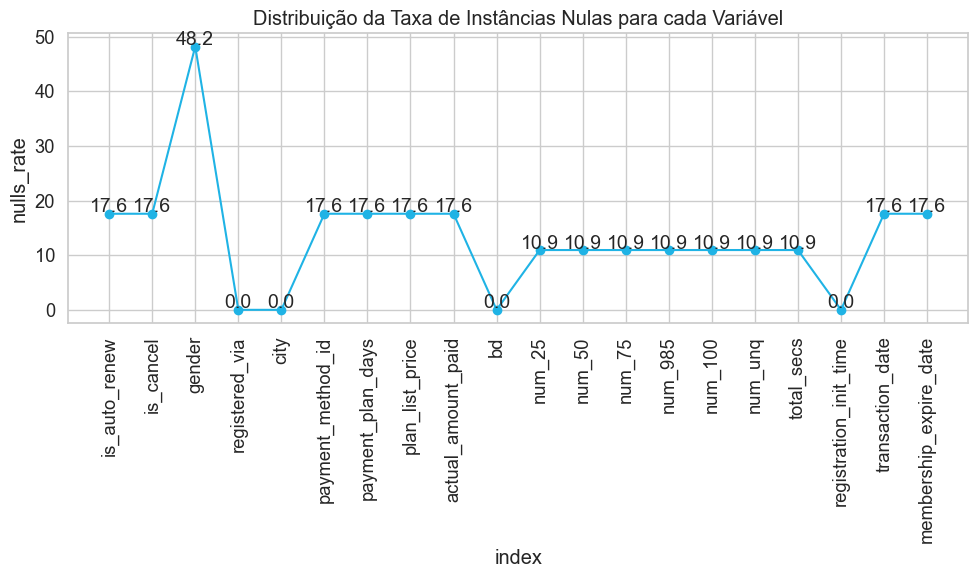

Tipo 1 - Clientes com variáveis 'cadastrais' nulas


,msno,churn,safra,is_auto_renew,is_cancel,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
1,C2EZKxdn8zEHgz6hYkBY5A3eaA4yMDLNABU6x7ZZ4Ec=,1,201603,None,None,male,3,5,None,None,None,None,21,6.00,4.00,2.00,0.00,52.00,45.00,13265.79,20130309,None,None
21,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,0,201602,None,None,male,3,13,None,None,None,None,25,33.00,8.00,7.00,5.00,304.00,328.00,78242.59,20130927,None,None
22,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201603,None,None,male,3,13,None,None,None,None,25,51.00,14.00,15.00,16.00,672.00,702.00,172079.19,20130927,None,None
23,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201604,None,None,male,3,13,None,None,None,None,25,22.00,8.00,6.00,6.00,274.00,289.00,71155.75,20130927,None,None
24,fzCMsGaNGvjS8BIjiuAhPDfPJ+7wLeTznTzjG/r7udM=,1,201605,None,None,male,3,13,None,None,None,None,25,18.00,3.00,2.00,3.00,88.00,113.00,22833.38,20130927,None,None
34,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201602,None,None,male,3,13,None,None,None,None,23,29.00,45.00,30.00,105.00,1430.00,1605.00,402072.29,20121025,None,None
35,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201603,None,None,male,3,13,None,None,None,None,23,24.00,29.00,22.00,56.00,686.00,775.00,193614.48,20121025,None,None
36,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201604,None,None,male,3,13,None,None,None,None,23,61.00,40.00,29.00,93.00,991.00,1123.00,286122.33,20121025,None,None
37,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201605,None,None,male,3,13,None,None,None,None,23,55.00,24.00,15.00,35.00,845.00,794.00,229854.30,20121025,None,None
38,1DGCBTM2eJTqWkk6GEvfLbBF+apDQ9S+XE0wYWAodbI=,0,201606,None,None,male,3,13,None,None,None,None,23,58.00,38.00,28.00,51.00,763.00,879.00,218402.26,20121025,None,None



Tipo 2 - Clientes com variáveis 'de consumo' nulas


,msno,churn,safra,is_auto_renew,is_cancel,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
31,2Zz3EC+5ydorej3v12/ZCl2d3iTmzmxZCUyTVEiarqA=,0,201608,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150924,20160823,20160923
125,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201603,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160310,20160410
126,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201604,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160410,20160510
127,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201605,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160510,20160610
128,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201606,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160610,20160710
129,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201607,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160710,20160810
130,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201608,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160810,20160910
131,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201609,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20160910,20161010
132,z3g0fwI1pfKqbB7B3lYt1X3/pESW7OUcWLIa9D82+mU=,0,201610,1,0,None,7,1,41,30,99,99,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150810,20161010,20161110
168,HkHWje6bdmSvJvuRr8g31ctxIqC+sFvVCl40d/7pl88=,0,201602,1,0,female,7,6,41,30,99,99,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160223,20160223,20160322



Tipo 3 - Clientes com variáveis 'cadastrais' e 'de consumo' nulas


,msno,churn,safra,is_auto_renew,is_cancel,gender,registered_via,city,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,bd,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,registration_init_time,transaction_date,membership_expire_date
134,e7CTuQdBHhlaQ4wUqyHntGL+kf69Naoyhz/jEgU4NZw=,1,201607,None,None,None,4,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160528,None,None
327,rCQz4rLwn7ifKSpEAZUG6U1QaAsoirjf55GLlZcOwN4=,1,201602,None,None,female,9,4,None,None,None,None,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20140721,None,None
441,QprfC0J4yzVhbQs9fxxsXBPyAS5+2QDFB/6gsUTI/oc=,1,201603,None,None,female,9,11,None,None,None,None,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20040914,None,None
507,K5pbcXFJ0B4Ds/aOcoXP9wD6hpdbhxETx/6P9drNIbE=,1,201609,None,None,male,7,22,None,None,None,None,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150102,None,None
545,r/3ubxoCkjG/chsSAwe7a2KgBIykFS6zAx66s1UAmvs=,1,201603,None,None,None,7,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20151216,None,None
547,WQOTopEHewT0huG/aOnxEmd+MOu0eTljaZIVqD4NPnI=,1,201607,None,None,None,4,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160609,None,None
709,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201608,None,None,None,7,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
710,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201609,None,None,None,7,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
711,swQQaPprOx4j99Fch1piM8/Lbuc+OLut7hAKSqhjBPw=,0,201610,None,None,None,7,1,None,None,None,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130719,None,None
849,UjgwfIzYuEws9C+qpUyU1FF0KewdWby2XWKttaU328o=,1,201606,None,None,female,9,13,None,None,None,None,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20040918,None,None


In [ ]:
df_nulls = (
    pd.DataFrame(
        df_train
        .drop(["msno", "safra", "churn"], axis = 1)
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_train.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

print("Tipo 1 - Clientes com variáveis 'cadastrais' nulas")
display(df_train.loc[(df_train["actual_amount_paid"].isna()) & (~df_train["num_25"].isna())].head(10))
print()
print("Tipo 2 - Clientes com variáveis 'de consumo' nulas")
display(df_train.loc[(~df_train["actual_amount_paid"].isna()) & (df_train["num_25"].isna())].head(10))
print()
print("Tipo 3 - Clientes com variáveis 'cadastrais' e 'de consumo' nulas")
display(df_train.loc[(df_train["actual_amount_paid"].isna()) & df_train["num_25"].isna()].head(10))

# <font color='green' style='font-size: 30px;'> 5.3) Encoder de Categóricas </font>
<hr style='border: 2px solid green;'>

> 1. Usar o WOE como Target Encoder

In [ ]:
def target_encoder_woe(df, feature):

    woe = woe.sort_values(by = 'woe_mean', ascending = True, inplace = True)

    # Puxa as informações para a tabela de interesse
    df = df.merge(woe, on = [feature], how = "left")
    df = df.drop(feature, axis = 1).rename({"woe":feature}, axis = 1)

In [ ]:
def target_encoder_woe(df, feature):

    if feature == "city":
        df['city'] = (
                    np.where(df['city'].isin([0]), -0.11, 
                    np.where(df['city'].isin([1]), -0.03, 
                    np.where(df['city'].isin([2]), 0.01, 
                    np.where(df['city'].isin([3]), 0.09, 
                    np.where(df['city'].isin([4]), 0.46, 
                    99999)))))
        )

    else:
        df['payment_method_id'] = (
                    np.where(df['city'].isin([0]), -2.39, 
                    np.where(df['city'].isin([1]), -1.39, 
                    np.where(df['city'].isin([2]), -0.77, 
                    np.where(df['city'].isin([3]), 0.19, 
                    np.where(df['city'].isin([4]), 2.32, 
                    99999)))))
        )


    return df
    

In [ ]:
# Calcula o Woe para cada classe
for feature in ["city", "payment_method_id"]:
    churn = df_train.dropna().loc[df_train.dropna()["churn"] == 1].groupby(feature, as_index = False)["churn"].count().rename({"churn":'churn'}, axis = 1)
    sem_churn = df_train.dropna().loc[df_train.dropna()["churn"] == 0].groupby(feature, as_index = False)["churn"].count().rename({"churn":'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)

    # Cria os percentis para agrupar classes de WOE semelhante e calcula o WOE médio

    woe["percentiles"] = transform_to_percentiles(woe[[feature, "woe"]], 5, "woe")
    woe_groupped = woe.groupby("percentiles", as_index = False)["woe"].mean().rename({"woe":f"woe_mean_{feature}"}, axis = 1)
    woe = woe.merge(woe_groupped, on = "percentiles", how = "left")
    woe = woe[[feature, "woe", "percentiles", f"woe_mean_{feature}"]]
    woe.sort_values(by = "woe", ascending = True, inplace = True)

    display(woe)

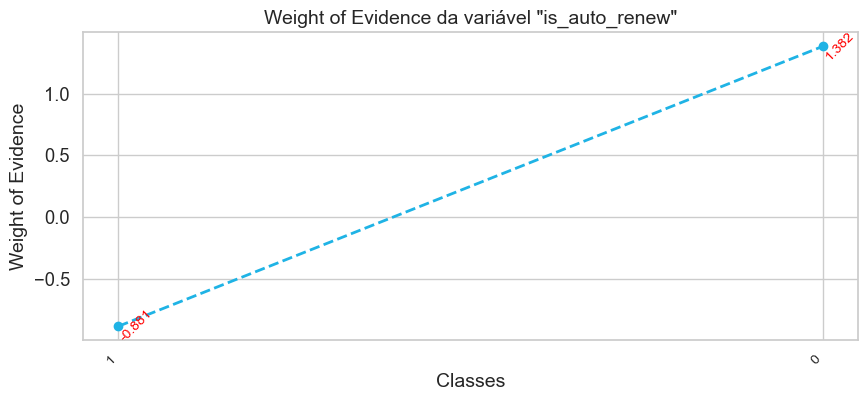

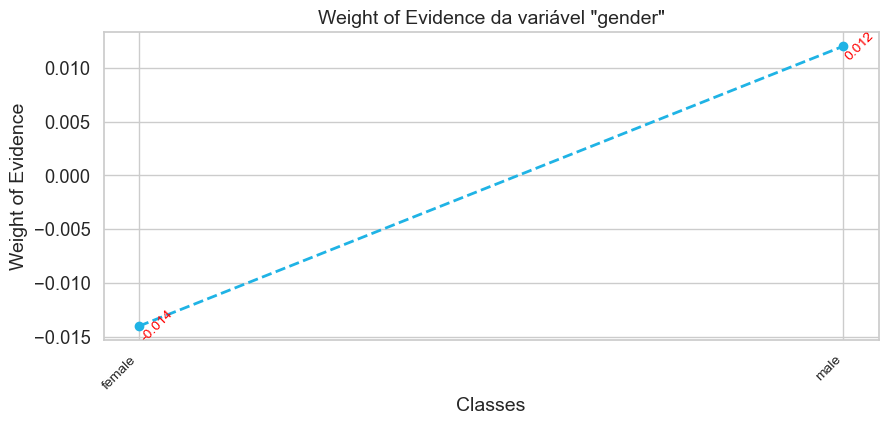

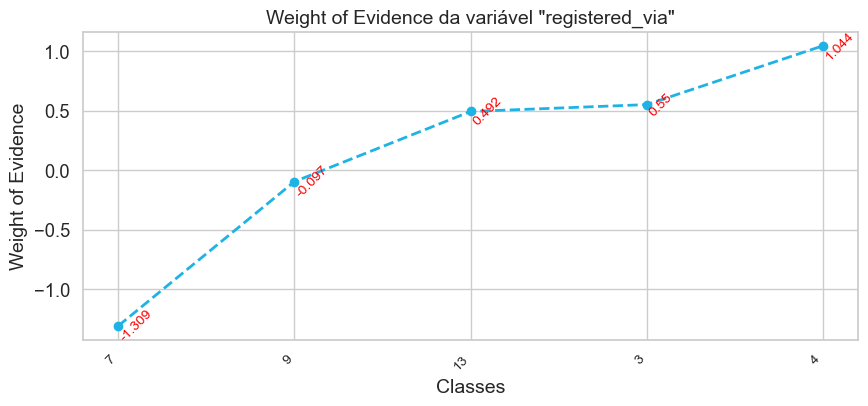

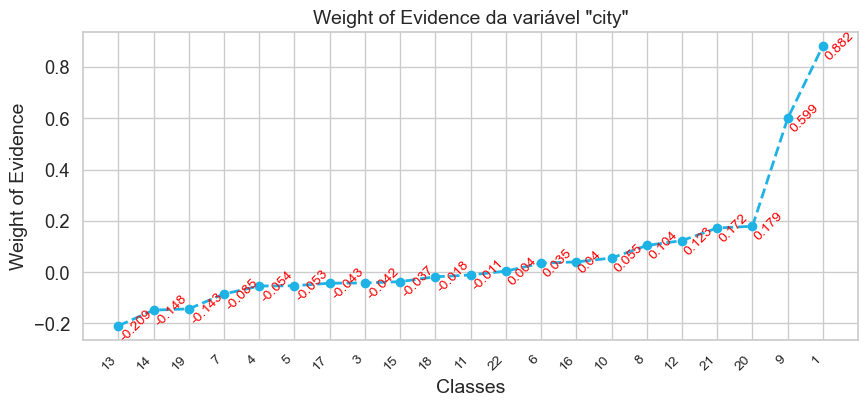

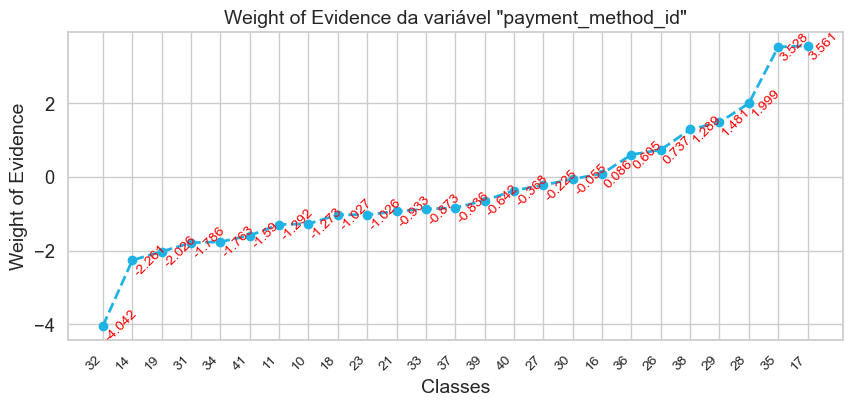

In [ ]:
df_eda_categoricas = df_train[variaveis_categoricas + ["churn"]].dropna().copy()
for col in df_eda_categoricas[variaveis_categoricas].columns:
    df_eda_categoricas[col] = df_eda_categoricas[col].apply(lambda x:str(x))
    woe(df_eda_categoricas, col, "churn")

<font color='red' style='font-size: 40px;'> 6)  Feature Selection </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 6.1) Exclusão de variáveis contínuas altamente correlacionadas  </font>
<hr style='border: 2px solid green;'>

# <font color='green' style='font-size: 30px;'> 6.2) Random Forest Feature Importance </font>
<hr style='border: 2px solid green;'>

<font color='red' style='font-size: 40px;'> 7)  Modelagem (Foco em Aprendizado Supervisionado) </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 7.1) Treinamento dos Modelos </font>
<hr style='border: 2px solid green;'>

In [ ]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

# <font color='green' style='font-size: 30px;'> 7.2) Otimização </font>
<hr style='border: 2px solid green;'>

# <font color='green' style='font-size: 30px;'> 7.3) Análise de Resultados para o Teste e OOT </font>
<hr style='border: 2px solid green;'>

> 1. Passar por:

- Criação e seleção de features
- Pré-Processamento (Encoder e valores ausentes)
- Escoragem do Teste e OOT

# <font color='green' style='font-size: 30px;'> 7.4) Resultados Esperados - Problema 1 </font>
<hr style='border: 2px solid green;'>

> 1. Analisar o Threshold de Probabilidade

<font color='red' style='font-size: 40px;'> 8) Modelagem (Foco em Aprendizado Não-Supervisionado) </font>
<hr style='border: 2px solid red;'>